# Instal library

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
import time
import random
from scipy import stats
from scipy.stats import spearmanr, pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from datetime import datetime
import os

# Visualisasi
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, MinMaxScaler, QuantileTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer

# Reduksi Dimensi
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD, FastICA, NMF
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, SpectralEmbedding
from umap import UMAP

# Feature Selection
from sklearn.feature_selection import SelectKBest, mutual_info_regression, VarianceThreshold, mutual_info_classif, f_classif, RFECV, SelectFromModel, RFE

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, SpectralClustering, Birch, AffinityPropagation
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import hdbscan # Perlu diinstall: pip install hdbscan
from sklearn.base import BaseEstimator, ClusterMixin
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

# Klasifikasi
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from joblib import dump, load

# Penanganan Imbalanced Dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN

# Deteksi Outlier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
warnings.filterwarnings('ignore')

# Data Cleaning & Preparation

In [116]:
df = pd.read_csv('./data/employee_data.csv')

display(df.head())

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [117]:
print("Ukuran dataset:", df.shape)
print("\nInformasi tentang tipe data:")
display(df.info())

Ukuran dataset: (1470, 35)

Informasi tentang tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInv

None

In [118]:
display(df.describe())

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [119]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [120]:
df.dropna(inplace=True)

In [121]:
df.isnull().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Feature Engineering

## Salary Category

In [122]:
def salary_category(income):
    if income < 5000:
        return 'Rendah (< 5000)'
    elif income < 10000:
        return 'Sedang (5000-10000)'
    elif income < 15000:
        return 'Tinggi (10000-15000)'
    else:
        return 'Sangat Tinggi (>15000)'

df['SalaryCategory'] = df['MonthlyIncome'].apply(salary_category)

## Promotion Category

In [123]:
def promotion_category(years):
    if years == 0:
        return 'Baru Dipromosikan'
    elif years <= 2:
        return '1-2 Tahun'
    elif years <= 5:
        return '3-5 Tahun'
    else:
        return '> 5 Tahun'

df['PromotionCategory'] = df['YearsSinceLastPromotion'].apply(promotion_category)

## Age Category

In [124]:
# Buat kategori usia
def age_category(age):
    if age < 30:
        return '< 30'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    else:
        return '50+'

df['AgeGroup'] = df['Age'].apply(age_category)

## Satisfaction Category

In [125]:
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 
                     'RelationshipSatisfaction', 'WorkLifeBalance']
satisfaction_labels = {1: 'Rendah', 2: 'Sedang', 3: 'Tinggi', 4: 'Sangat Tinggi'}

df_satisfaction = df.copy()
for col in satisfaction_cols:
    df_satisfaction[col] = df_satisfaction[col].map(satisfaction_labels)

# Exploratory Data Analysis (EDA)

## Analisis Univariate

### Distribusi Attrition

In [126]:
attrition_counts = df['Attrition'].value_counts()
attrition_percentage = df['Attrition'].value_counts(normalize=True) * 100

attrition_df = pd.DataFrame({
    'Count': attrition_counts,
    'Percentage': attrition_percentage
})

print("Distribusi Attrition:")
display(attrition_df)

fig = px.pie(
    names=['Tidak Keluar', 'Keluar'] if 0 in attrition_counts.index else ['Keluar', 'Tidak Keluar'],
    values=attrition_counts.values,
    title='Persentase Karyawan yang Keluar vs Bertahan',
    color_discrete_sequence=px.colors.qualitative.Set3,
    hole=0.4
)
fig.update_traces(textinfo='percent+label', textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

fig.write_image("./visualisasi/presentase_attrition.jpg", scale=1)

Distribusi Attrition:


,Count,Percentage
Attrition,,
0.0,879,83.081285
1.0,179,16.918715


## Analisis Bivariate

### Attrition by Age

In [127]:
age_group_attrition = df.groupby('AgeGroup')['Attrition'].mean() * 100
age_group_counts = df.groupby('AgeGroup').size()

order = ['< 30', '30-39', '40-49', '50+']
age_group_attrition = age_group_attrition.reindex(order)
age_group_counts = age_group_counts.reindex(order)

age_group_df = pd.DataFrame({
    'Jumlah Karyawan': age_group_counts,
    'Tingkat Attrition (%)': age_group_attrition
})

display(age_group_df)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=age_group_df.index,
        y=age_group_df['Jumlah Karyawan'],
        name='Jumlah Karyawan',
        marker_color='royalblue',
        opacity=0.7
    ),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=age_group_df.index,
        y=age_group_df['Tingkat Attrition (%)'],
        name='Tingkat Attrition (%)',
        marker_color='firebrick',
        mode='lines+markers',
        marker=dict(size=10),
        line=dict(width=3)
    ),
    secondary_y=True
)

fig.update_layout(
    title_text='Distribusi dan Tingkat Attrition Berdasarkan Kelompok Usia',
    template='plotly_white'
)

fig.update_xaxes(title_text='Kelompok Usia')
fig.update_yaxes(title_text='Jumlah Karyawan', secondary_y=False)
fig.update_yaxes(title_text='Tingkat Attrition (%)', secondary_y=True)

fig.show()
fig.write_image("./visualisasi/distribusi_usia_attrition.jpg", scale=1)

,Jumlah Karyawan,Tingkat Attrition (%)
AgeGroup,,
< 30,236,29.661017
30-39,437,15.102975
40-49,243,10.699588
50+,142,11.971831


### Attrition by Departemen

In [128]:
dept_attrition = df.groupby('Department')['Attrition'].mean().sort_values(ascending=False) * 100
dept_counts = df.groupby('Department').size()

dept_df = pd.DataFrame({
    'Jumlah Karyawan': dept_counts,
    'Tingkat Attrition (%)': dept_attrition
})

display(dept_df)

fig = px.bar(
    x=dept_attrition.index,
    y=dept_attrition.values,
    color=dept_attrition.values,
    text=dept_attrition.values.round(1),
    title='Tingkat Attrition (%) Berdasarkan Departemen',
    labels={'x': 'Departemen', 'y': 'Tingkat Attrition (%)'},
    color_continuous_scale='Viridis'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(coloraxis_showscale=False, template='plotly_white')

fig.show()

fig.write_image("./visualisasi/tingkat_attrition_departemen.jpg", scale=1)

,Jumlah Karyawan,Tingkat Attrition (%)
Department,,
Human Resources,38,15.789474
Research & Development,701,15.263909
Sales,319,20.689655


### Attrition by JobLevel

In [129]:
joblevel_attrition = df.groupby('JobLevel')['Attrition'].mean().sort_values(ascending=False) * 100
joblevel_counts = df.groupby('JobLevel').size()

joblevel_df = pd.DataFrame({
    'Tingkat Attrition (%)': joblevel_attrition,
    'Jumlah Karyawan': joblevel_counts
})

display(joblevel_df)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=joblevel_df.index,
    y=joblevel_df['Jumlah Karyawan'],
    name='Jumlah Karyawan',
    marker_color='lightblue',
    opacity=0.7,
    yaxis='y'
))

fig.add_trace(go.Scatter(
    x=joblevel_df.index,
    y=joblevel_df['Tingkat Attrition (%)'],
    name='Tingkat Attrition (%)',
    marker_color='red',
    mode='lines+markers',
    marker=dict(size=10),
    yaxis='y2'
))

fig.update_layout(
    title='Distribusi Attrition dan Jumlah Karyawan berdasarkan Job Level',
    xaxis=dict(title='Job Level'),
    yaxis=dict(title='Jumlah Karyawan', side='left', showgrid=False),
    yaxis2=dict(title='Tingkat Attrition (%)', side='right', overlaying='y', showgrid=False),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()

fig.write_image("./visualisasi/attrition_job_level.jpg", scale=2)

,Tingkat Attrition (%),Jumlah Karyawan
JobLevel,,
1,27.411168,394
2,10.164835,364
3,15.151515,165
4,5.000000,80
5,9.090909,55


### Attrition by MaritalStatus

In [130]:
marital_attrition = df.groupby('MaritalStatus')['Attrition'].mean() * 100
marital_counts = df.groupby('MaritalStatus').size()

marital_df = pd.DataFrame({
    'Jumlah Karyawan': marital_counts,
    'Tingkat Attrition (%)': marital_attrition
})

display(marital_df)

custom_labels = [f"{status}<br>Attrition: {attrition:.1f}%" 
                for status, attrition in zip(marital_attrition.index, marital_attrition.values)]

fig = go.Figure(go.Pie(
    labels=custom_labels,
    values=marital_counts.values,
    hole=0.4,
    textposition='outside',
    textinfo='percent', 
    pull=[0.05, 0.05, 0.05],
    marker=dict(
        colors=['#F9D876', '#F98B60', '#61D4D5'],
        line=dict(color='#FFFFFF', width=2)
    )
))

fig.update_layout(
    title='Distribusi Karyawan Berdasarkan Status Pernikahan',
    template='plotly_white',
    legend_title='Status Pernikahan & Tingkat Attrition',
    margin=dict(t=80, b=20, l=20, r=20),
    height=600,
    width=800
)

fig.add_annotation(
    text="Status<br>Pernikahan",
    x=0.5, y=0.5,
    font_size=14,
    showarrow=False
)

fig.show()

fig.write_image("./visualisasi/distribusi_status_pernikahan.jpg", scale=2)

,Jumlah Karyawan,Tingkat Attrition (%)
MaritalStatus,,
Divorced,242,9.504132
Married,464,13.362069
Single,352,26.704545


### Attrition by Distance

In [131]:
distance_stats = df.groupby('Attrition')['DistanceFromHome'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()

distance_stats['Attrition'] = distance_stats['Attrition'].map({0: 'Tidak Keluar', 1: 'Keluar'})

display(distance_stats)

fig = px.box(
    df, 
    x='Attrition', 
    y='DistanceFromHome',
    color='Attrition',
    title='Hubungan Jarak dari Rumah dengan Attrition',
    labels={'DistanceFromHome': 'Jarak dari Rumah (km)', 'Attrition': 'Status Keluar'},
    color_discrete_sequence=['#636EFA', '#EF553B']
)
fig.update_layout(template='plotly_white')

fig.show()

fig.write_image("./visualisasi/jarak_rumah_attrition.jpg", scale=2)

,Attrition,mean,median,min,max,std
0,Tidak Keluar,8.695108,7.0,1,29,7.909964
1,Keluar,10.368715,8.0,1,29,8.541263


### Attrtion by Satisfaction

In [132]:
df_satisfaction = df.copy()
for col in satisfaction_cols:
    df_satisfaction[col] = df_satisfaction[col].map(satisfaction_labels)

display(df_satisfaction)

fig = make_subplots(rows=2, cols=2, 
                   subplot_titles=['Kepuasan Lingkungan', 'Kepuasan Kerja', 
                                  'Kepuasan Hubungan', 'Work Life Balance'],)

col_positions = [
    ('EnvironmentSatisfaction', 1, 1),
    ('JobSatisfaction', 1, 2),
    ('RelationshipSatisfaction', 2, 1),
    ('WorkLifeBalance', 2, 2)
]

for col, row, col_pos in col_positions:
    attrition_by_satisfaction = df_satisfaction.groupby(col)['Attrition'].mean() * 100
    
    fig.add_trace(
        go.Bar(
            x=attrition_by_satisfaction.index,
            y=attrition_by_satisfaction.values,
            text=[f'{val:.1f}%' for val in attrition_by_satisfaction.values],
            textposition='auto',
            marker_color='lightseagreen'
        ),
        row=row, col=col_pos
    )

fig.update_layout(
    height=600,
    width=900,
    showlegend=False,
    title_text='Tingkat Attrition (%) Berdasarkan Faktor Kepuasan',
    template='plotly_white'
)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=12, color='#000000')

fig.update_xaxes(title_text='Tingkat Kepuasan')
fig.update_yaxes(title_text='Tingkat Attrition (%)')

fig.show()

fig.write_image("./visualisasi/tingkat_attrition_kepuasan.jpg", scale=2)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryCategory,PromotionCategory,AgeGroup
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,15,2,Rendah,1,0,0,0,Rendah (< 5000),Baru Dipromosikan,30-39
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,18,2,Sangat Tinggi,10,0,2,7,Rendah (< 5000),1-2 Tahun,50+
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,23,2,Sangat Tinggi,20,4,4,8,Tinggi (10000-15000),3-5 Tahun,40-49
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,6,2,Sedang,4,3,0,2,Sedang (5000-10000),Baru Dipromosikan,40-49
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,24,2,Tinggi,5,2,1,4,Sangat Tinggi (>15000),1-2 Tahun,50+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,...,10,2,Sedang,10,7,1,9,Sedang (5000-10000),1-2 Tahun,< 30
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,10,4,Sangat Tinggi,1,0,0,0,Sedang (5000-10000),Baru Dipromosikan,30-39
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,1,4,Sedang,1,1,0,0,Rendah (< 5000),Baru Dipromosikan,< 30
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,6,0,Tinggi,4,2,0,0,Rendah (< 5000),Baru Dipromosikan,40-49


### Attrition by JobRole

In [133]:
jobrole_attrition = df.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False) * 100
jobrole_counts = df.groupby('JobRole').size()

jobrole_df = pd.DataFrame({
    'Tingkat Attrition (%)': jobrole_attrition,
    'Jumlah Karyawan': jobrole_counts
})

display(jobrole_df)

fig = px.bar(
    x=jobrole_attrition.index,
    y=jobrole_attrition.values,
    color=jobrole_attrition.values,
    text=jobrole_attrition.values.round(1),
    title='Tingkat Attrition (%) Berdasarkan Job Role',
    labels={'x': 'Job Role', 'y': 'Tingkat Attrition (%)'},
    color_continuous_scale='Viridis'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
    coloraxis_showscale=False,
    xaxis_tickangle=-45,
    template='plotly_white'
)
fig.show()

fig.write_image("./visualisasi/tingkat_attrition_job_role.jpg", scale=2)

,Tingkat Attrition (%),Jumlah Karyawan
JobRole,,
Healthcare Representative,9.090909,88
Human Resources,20.000000,30
Laboratory Technician,26.063830,188
Manager,6.329114,79
Manufacturing Director,6.542056,107
Research Director,3.225806,62
Research Scientist,17.757009,214
Sales Executive,16.810345,232
Sales Representative,43.103448,58


### Attrition by Overtime

In [134]:
overtime_attrition = df.groupby('OverTime')['Attrition'].mean() * 100
overtime_counts = df.groupby('OverTime').size()

overtime_df = pd.DataFrame({
    'Jumlah Karyawan': overtime_counts,
    'Tingkat Attrition (%)': overtime_attrition
})

display(overtime_df)

fig = px.bar(
    x=overtime_attrition.index,
    y=overtime_attrition.values,
    color=overtime_attrition.values,
    text=overtime_attrition.values.round(1),
    title='Tingkat Attrition (%) Berdasarkan Status Overtime',
    labels={'x': 'Overtime', 'y': 'Tingkat Attrition (%)'},
    color_continuous_scale='Reds'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(coloraxis_showscale=False, template='plotly_white')
fig.show()

fig.write_image("./visualisasi/tingkat_attrition_overtime.jpg", scale=2)

,Jumlah Karyawan,Tingkat Attrition (%)
OverTime,,
No,751,10.785619
Yes,307,31.921824


### Attrition by Salary Category

In [135]:
salary_attrition = df.groupby('SalaryCategory')['Attrition'].mean() * 100
salary_counts = df.groupby('SalaryCategory').size()

order = ['Rendah (< 5000)', 'Sedang (5000-10000)', 'Tinggi (10000-15000)', 'Sangat Tinggi (>15000)']
salary_attrition = salary_attrition.reindex(order)
salary_counts = salary_counts.reindex(order)

salary_df = pd.DataFrame({
    'Jumlah Karyawan': salary_counts,
    'Tingkat Attrition (%)': salary_attrition
})

display(salary_df)

fig = px.bar(
    x=salary_attrition.index,
    y=salary_attrition.values,
    color=salary_attrition.values,
    text=salary_attrition.values.round(1),
    title='Tingkat Attrition (%) Berdasarkan Kategori Gaji',
    labels={'x': 'Kategori Gaji', 'y': 'Tingkat Attrition (%)'},
    color_continuous_scale='Greens_r'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(coloraxis_showscale=False, template='plotly_white')
fig.show()
fig.write_image("./visualisasi/tingkat_attrition_kategori_gaji.jpg", scale=2)

,Jumlah Karyawan,Tingkat Attrition (%)
SalaryCategory,,
Rendah (< 5000),542,22.878229
Sedang (5000-10000),297,11.784512
Tinggi (10000-15000),117,12.820513
Sangat Tinggi (>15000),102,4.901961


### Attrition by Gender

In [136]:
gender_attrition = df.groupby('Gender')['Attrition'].mean() * 100
gender_counts = df.groupby('Gender').size()

gender_df = pd.DataFrame({
    'Jumlah Karyawan': gender_counts,
    'Tingkat Attrition (%)': gender_attrition
})

display(gender_df)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=gender_counts.index,
    y=gender_counts.values,
    name='Jumlah Karyawan',
    marker_color='skyblue',
    opacity=0.7,
    text=gender_counts.values,
    textposition='auto',
    yaxis='y'
))

fig.add_trace(go.Scatter(
    x=gender_attrition.index,
    y=gender_attrition.values,
    name='Tingkat Attrition (%)',
    marker_color='red',
    mode='lines+markers+text',
    marker=dict(size=12),
    text=[f'{val:.1f}%' for val in gender_attrition.values],
    textposition='top center',
    yaxis='y2'
))

fig.update_layout(
    title='Jumlah Karyawan dan Tingkat Attrition Berdasarkan Jenis Kelamin',
    xaxis=dict(title='Jenis Kelamin'),
    yaxis=dict(title='Jumlah Karyawan', side='left', showgrid=False),
    yaxis2=dict(title='Tingkat Attrition (%)', side='right', overlaying='y', showgrid=False),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()
fig.write_image("./visualisasi/tingkat_attrition_jenis_kelamin.jpg", scale=2)

,Jumlah Karyawan,Tingkat Attrition (%)
Gender,,
Female,438,16.210046
Male,620,17.419355


### Attrition by Education Background

In [137]:
education_field_attrition = df.groupby('EducationField')['Attrition'].mean() * 100
education_field_counts = df.groupby('EducationField').size()

education_field_df = pd.DataFrame({
    'Jumlah Karyawan': education_field_counts,
    'Tingkat Attrition (%)': education_field_attrition
})

education_field_df = education_field_df.sort_values('Tingkat Attrition (%)', ascending=False)
display(education_field_df)

fig = px.bar(
    education_field_df,
    x=education_field_df.index,
    y='Tingkat Attrition (%)',
    color='Tingkat Attrition (%)',
    text=education_field_df['Tingkat Attrition (%)'].round(1),
    title='Tingkat Attrition (%) Berdasarkan Bidang Pendidikan',
    labels={'y': 'Tingkat Attrition (%)', 'x': 'Bidang Pendidikan'},
    color_continuous_scale='Blues_r'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(coloraxis_showscale=False, template='plotly_white')
fig.show()
fig.write_image("./visualisasi/tingkat_attrition_bidang_pendidikan.jpg", scale=2)

,Jumlah Karyawan,Tingkat Attrition (%)
EducationField,,
Technical Degree,96,26.041667
Marketing,122,21.311475
Other,59,16.949153
Life Sciences,436,16.055046
Medical,330,13.939394
Human Resources,15,13.333333


### Attrition by LastTimePromoted

In [138]:
promotion_attrition = df.groupby('PromotionCategory')['Attrition'].mean() * 100
promotion_counts = df.groupby('PromotionCategory').size()

order = ['Baru Dipromosikan', '1-2 Tahun', '3-5 Tahun', '> 5 Tahun']
promotion_attrition = promotion_attrition.reindex(order)
promotion_counts = promotion_counts.reindex(order)

promotion_df = pd.DataFrame({
    'Jumlah Karyawan': promotion_counts,
    'Tingkat Attrition (%)': promotion_attrition
})

display(promotion_df)

fig = px.line(
    x=promotion_attrition.index,
    y=promotion_attrition.values,
    markers=True,
    text=promotion_attrition.values.round(1),
    title='Tingkat Attrition (%) Berdasarkan Tahun Sejak Promosi Terakhir',
    labels={'x': 'Tahun Sejak Promosi Terakhir', 'y': 'Tingkat Attrition (%)'},
)
fig.update_traces(
    marker=dict(size=10, color='blue'),
    line=dict(width=3, color='purple'),
    textposition='top center'
)
fig.update_layout(template='plotly_white')
fig.show()
fig.write_image("./visualisasi/tingkat_attrition_promotion.jpg", scale=2)

,Jumlah Karyawan,Tingkat Attrition (%)
PromotionCategory,,
Baru Dipromosikan,427,19.437939
1-2 Tahun,358,15.642458
3-5 Tahun,118,11.864407
> 5 Tahun,155,16.774194


## Multivariate

In [139]:
pivot_overtime_satisfaction = pd.crosstab(
    index=df['OverTime'],
    columns=df['JobSatisfaction'],
    values=df['Attrition'],
    aggfunc='mean'
) * 100

satisfaction_labels = {1: 'Rendah', 2: 'Sedang', 3: 'Tinggi', 4: 'Sangat Tinggi'}
pivot_overtime_satisfaction.columns = [satisfaction_labels[col] for col in pivot_overtime_satisfaction.columns]

print("Tingkat Attrition (%) berdasarkan Overtime dan Job Satisfaction:")
display(pivot_overtime_satisfaction)

fig = px.imshow(
    pivot_overtime_satisfaction,
    text_auto='.1f',
    aspect='auto',
    color_continuous_scale='RdYlGn_r',
    title='Tingkat Attrition (%) Berdasarkan Overtime dan Job Satisfaction',
    labels=dict(x='Tingkat Kepuasan Kerja', y='Overtime', color='Attrition Rate (%)')
)
fig.update_layout(template='plotly_white')
fig.show()

fig.write_image("./visualisasi/attrition_overtime_jobsatisfaction.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_overtime_jobsatisfaction.jpg'")

Tingkat Attrition (%) berdasarkan Overtime dan Job Satisfaction:


,Rendah,Sedang,Tinggi,Sangat Tinggi
OverTime,,,,
No,18.309859,8.510638,11.403509,7.083333
Yes,31.746032,37.037037,40.000000,22.000000


Visualisasi telah disimpan sebagai './visualisasi/attrition_overtime_jobsatisfaction.jpg'


In [140]:
pivot_dept_joblevel = pd.crosstab(
    index=df['Department'],
    columns=df['JobLevel'],
    values=df['Attrition'],
    aggfunc='mean'
) * 100

print("Tingkat Attrition (%) berdasarkan Department dan Job Level:")
display(pivot_dept_joblevel)

fig = px.imshow(
    pivot_dept_joblevel,
    text_auto='.1f',
    aspect='auto',
    color_continuous_scale='Viridis_r',
    title='Tingkat Attrition (%) Berdasarkan Department dan Job Level',
    labels=dict(x='Job Level', y='Department', color='Attrition Rate (%)')
)
fig.update_layout(template='plotly_white')
fig.show()

fig.write_image("./visualisasi/attrition_department_joblevel.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_department_joblevel.jpg'")

Tingkat Attrition (%) berdasarkan Department dan Job Level:


JobLevel,1,2,3,4,5
Department,,,,,
Human Resources,22.222222,0.000000,50.000000,0.000000,0.0
Research & Development,24.844720,5.851064,12.121212,1.923077,7.5
Sales,44.444444,15.476190,17.741935,12.000000,20.0


Visualisasi telah disimpan sebagai './visualisasi/attrition_department_joblevel.jpg'


In [141]:
fig = px.scatter(
    df,
    x='MonthlyIncome',
    y='DistanceFromHome',
    color='Attrition',
    facet_col='OverTime',
    opacity=0.7,
    hover_name='JobRole',
    hover_data=['Age', 'YearsAtCompany', 'JobSatisfaction'],
    title='Hubungan antara Gaji, Jarak dari Rumah, Overtime dengan Attrition',
    labels={
        'MonthlyIncome': 'Gaji Bulanan',
        'DistanceFromHome': 'Jarak dari Rumah (km)',
        'Attrition': 'Status Attrition',
        'OverTime': 'Status Overtime'
    },
    color_discrete_sequence=['green', 'red']
)
fig.update_layout(
    template='plotly_white',
    height=600
)
fig.show()

fig.write_image("./visualisasi/attrition_income_distance_overtime.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_income_distance_overtime.jpg'")

Visualisasi telah disimpan sebagai './visualisasi/attrition_income_distance_overtime.jpg'


In [142]:
if 'AgeGroup' not in df.columns:
    df['AgeGroup'] = pd.cut(
        df['Age'],
        bins=[20, 30, 40, 50, 60],
        labels=['20-29', '30-39', '40-49', '50-59']
    )

pivot_age_joblevel = pd.crosstab(
    index=df['AgeGroup'],
    columns=df['JobLevel'],
    values=df['Attrition'],
    aggfunc='mean'
) * 100


print("Tingkat Attrition (%) berdasarkan Kelompok Usia dan Job Level:")
display(pivot_age_joblevel)

fig = px.imshow(
    pivot_age_joblevel,
    text_auto='.1f',
    aspect='auto',
    color_continuous_scale='Plasma_r',
    title='Tingkat Attrition (%) Berdasarkan Kelompok Usia dan Job Level',
    labels=dict(x='Job Level', y='Kelompok Usia', color='Attrition Rate (%)')
)
fig.update_layout(template='plotly_white')
fig.show()

fig.write_image("./visualisasi/attrition_age_joblevel.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_age_joblevel.jpg'")

Tingkat Attrition (%) berdasarkan Kelompok Usia dan Job Level:


JobLevel,1,2,3,4,5
AgeGroup,,,,,
30-39,22.560976,10.439560,11.111111,12.500000,0.000000
40-49,14.285714,7.777778,18.181818,6.250000,7.142857
50+,21.739130,14.285714,14.814815,2.564103,12.000000
< 30,37.341772,10.937500,30.769231,0.000000,NaN


Visualisasi telah disimpan sebagai './visualisasi/attrition_age_joblevel.jpg'


In [143]:
cross_analysis = pd.crosstab(
    index=df['OverTime'],
    columns=df['WorkLifeBalance'],
    values=df['Attrition'],
    aggfunc='mean'
) * 100

cross_analysis.columns = ['Buruk', 'Sedang', 'Baik', 'Sangat Baik']

display(cross_analysis)

fig = px.imshow(
    cross_analysis,
    text_auto='.1f',
    aspect='auto',
    color_continuous_scale='RdYlGn_r',
    title='Tingkat Attrition (%) Berdasarkan Overtime dan Work-Life Balance',
    labels=dict(x='Work-Life Balance', y='Overtime', color='Attrition Rate (%)')
)
fig.update_layout(template='plotly_white')
fig.show()

,Buruk,Sedang,Baik,Sangat Baik
OverTime,,,,
No,25.0,11.627907,8.333333,16.091954
Yes,45.0,31.645570,30.769231,30.769231


In [144]:
attrition_by_dept_role = df.groupby(['Department', 'JobRole'])['Attrition'].mean() * 100
count_by_dept_role = df.groupby(['Department', 'JobRole']).size()
satisfaction_by_dept_role = df.groupby(['Department', 'JobRole'])['JobSatisfaction'].mean()

multivariate_df = pd.DataFrame({
    'Tingkat Attrition (%)': attrition_by_dept_role,
    'Jumlah Karyawan': count_by_dept_role,
    'Rata-rata Kepuasan Kerja': satisfaction_by_dept_role
}).reset_index()

print("Tingkat Attrition (%), Jumlah Karyawan, dan Rata-rata Kepuasan Kerja berdasarkan Department dan Job Role:")
display(multivariate_df.sort_values('Tingkat Attrition (%)', ascending=False))

fig = px.scatter(
    multivariate_df,
    x='Rata-rata Kepuasan Kerja',
    y='Tingkat Attrition (%)',
    size='Jumlah Karyawan',
    color='Department',
    hover_name='JobRole',
    text='JobRole',
    title='Tingkat Attrition (%) vs Kepuasan Kerja berdasarkan Department dan Job Role',
    labels={
        'Rata-rata Kepuasan Kerja': 'Rata-rata Kepuasan Kerja (1-4)',
        'Tingkat Attrition (%)': 'Tingkat Attrition (%)'
    }
)
fig.update_traces(
    textposition='top center',
    marker=dict(sizemode='area', sizeref=0.1)
)
fig.update_layout(
    template='plotly_white',
    height=800,
    width=1000
)
fig.show()

fig.write_image("./visualisasi/attrition_dept_role_satisfaction.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_dept_role_satisfaction.jpg'")

Tingkat Attrition (%), Jumlah Karyawan, dan Rata-rata Kepuasan Kerja berdasarkan Department dan Job Role:


,Department,JobRole,Tingkat Attrition (%),Jumlah Karyawan,Rata-rata Kepuasan Kerja
10,Sales,Sales Representative,43.103448,58,2.758621
3,Research & Development,Laboratory Technician,26.063830,188,2.813830
0,Human Resources,Human Resources,20.000000,30,2.366667
7,Research & Development,Research Scientist,17.757009,214,2.780374
9,Sales,Sales Executive,16.810345,232,2.754310
2,Research & Development,Healthcare Representative,9.090909,88,2.829545
4,Research & Development,Manager,7.142857,42,2.452381
8,Sales,Manager,6.896552,29,2.827586
5,Research & Development,Manufacturing Director,6.542056,107,2.710280
6,Research & Development,Research Director,3.225806,62,2.725806


Visualisasi telah disimpan sebagai './visualisasi/attrition_dept_role_satisfaction.jpg'


In [145]:
new_variables = [
    'SalaryCategory',        
    'PromotionCategory',     
    'AgeGroup',              
    'DistanceCategory'       
]

existing_variables = [var for var in new_variables if var in df.columns]

if 'SalaryCategory' not in existing_variables:
    df['SalaryCategory'] = df['MonthlyIncome'].apply(lambda income: 
        'Rendah (< 5000)' if income < 5000 else
        'Sedang (5000-10000)' if income < 10000 else
        'Tinggi (10000-15000)' if income < 15000 else
        'Sangat Tinggi (>15000)'
    )

if 'PromotionCategory' not in existing_variables:
    df['PromotionCategory'] = df['YearsSinceLastPromotion'].apply(lambda years:
        'Baru Dipromosikan' if years == 0 else
        '1-2 Tahun' if years <= 2 else
        '3-5 Tahun' if years <= 5 else
        '> 5 Tahun'
    )

if 'AgeGroup' not in existing_variables:
    df['AgeGroup'] = df['Age'].apply(lambda age:
        '< 30' if age < 30 else
        '30-39' if age < 40 else
        '40-49' if age < 50 else
        '50+'
    )

if 'DistanceCategory' not in existing_variables:
    df['DistanceCategory'] = pd.cut(
        df['DistanceFromHome'],
        bins=[0, 5, 10, 20, 30],
        labels=['0-5 km', '6-10 km', '11-20 km', '21-30 km']
    )

print("Kolom-kolom dalam dataset final:")
display(pd.DataFrame({'Nama Kolom': df.columns}))

df.to_csv('./data/data_final_employee.csv', index=False)
try:
    df.to_excel('./data/data_final_employee.xlsx', index=False)
except Exception as e:
    print(f"Gagal menyimpan dalam format Excel: {e}")

Kolom-kolom dalam dataset final:


,Nama Kolom
0,EmployeeId
1,Age
2,Attrition
3,BusinessTravel
4,DailyRate
5,Department
6,DistanceFromHome
7,Education
8,EducationField
9,EmployeeCount


# Segmentation

In [146]:
CB_COLORS = {
    'blue': '#648FFF',    
    'orange': '#FE6100',  
}

HIGH_RISK_COLOR = CB_COLORS['orange']
LOW_RISK_COLOR = CB_COLORS['blue']

def print_header(text):
    print(f"\n{'='*80}\n{text}\n{'='*80}")

def display_and_save_figure(fig, filename, show_fig=True):
    if show_fig:
        fig.show()
    fig.write_image(filename)
    print(f"Visualisasi disimpan sebagai '{filename}'")
    return fig

In [147]:
def handle_infinite_values(df, features):
    df_clean = df.copy()

    stats_df = pd.DataFrame({
        'median': df_clean[features].median(),
        'mean': df_clean[features].mean(),
        'std': df_clean[features].std(),
        'min': df_clean[features].min(),
        'max': df_clean[features].max(),
        'q1': df_clean[features].quantile(0.25),
        'q3': df_clean[features].quantile(0.75),
    })

    stats_df['iqr'] = stats_df['q3'] - stats_df['q1']
    stats_df['lower_bound'] = stats_df['q1'] - 1.5 * stats_df['iqr']
    stats_df['upper_bound'] = stats_df['q3'] + 1.5 * stats_df['iqr']

    has_inf = np.any(np.isinf(df_clean[features].values))
    has_nan = df_clean[features].isna().any().any()
    
    if has_inf or has_nan:
        print("Data mengandung nilai tak terhingga atau NaN. Menangani masalah ini...")

        inf_count = np.isinf(df_clean[features]).sum()
        nan_count = df_clean[features].isna().sum()

        problem_cols = []
        for col in features:
            inf_vals = np.isinf(df_clean[col]).sum()
            nan_vals = df_clean[col].isna().sum()
            if inf_vals > 0 or nan_vals > 0:
                problem_cols.append((col, inf_vals, nan_vals))
                print(f"  - Kolom '{col}': {inf_vals} nilai tak terhingga, {nan_vals} nilai NaN")

        for col in features:
            df_clean[col] = df_clean[col].replace([np.inf, -np.inf], np.nan)

            if df_clean[col].notna().any():
                if df_clean[col].skew() > 1: 
                    fill_value = df_clean[col].median()
                    print(f"  - Mengganti nilai tak terhingga/NaN di kolom '{col}' dengan median: {fill_value}")
                else:
                    fill_value = df_clean[col].mean()
                    print(f"  - Mengganti nilai tak terhingga/NaN di kolom '{col}' dengan mean: {fill_value}")
                
                df_clean[col] = df_clean[col].fillna(fill_value)
            else:
                df_clean[col] = 0
                print(f"  - Semua nilai di kolom '{col}' tidak valid. Mengganti dengan 0.")

    print("\nMemperbaiki nilai ekstrem dengan metode IQR...")
    for col in features:
        if pd.api.types.is_numeric_dtype(df_clean[col]):
            lower = stats_df.loc[col, 'lower_bound']
            upper = stats_df.loc[col, 'upper_bound']

            outliers = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
            if outliers > 0:
                print(f"  - Kolom '{col}': {outliers} outlier terdeteksi dan diperbaiki")

                df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)
    
    return df_clean

In [148]:
class KMeansWithSilhouette(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=2, random_state=42, n_init=10):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.n_init = n_init
        self.kmeans = None
        self.silhouette = -1
        
    def fit(self, X, y=None):
        self.kmeans = KMeans(
            n_clusters=self.n_clusters,
            random_state=self.random_state,
            n_init=self.n_init
        )
        self.labels_ = self.kmeans.fit_predict(X)

        if len(np.unique(self.labels_)) > 1:
            self.silhouette = silhouette_score(X, self.labels_)
        else:
            self.silhouette = -1
        
        return self
    
    def predict(self, X):
        return self.kmeans.predict(X)
    
    def fit_predict(self, X, y=None):
        self.fit(X)
        return self.labels_

In [149]:
print_header("MEMBACA DAN MEMPERSIAPKAN DATA")
df = pd.read_csv('./data/data_final_employee.csv')
print(f"Ukuran dataset: {df.shape}")

print("\nMenangani missing value...")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(f"Missing values ditemukan: {missing_values[missing_values > 0]}")
    df.dropna(inplace=True)
    print(f"Ukuran dataset setelah menghapus missing value: {df.shape}")
else:
    print("Tidak ada missing value ditemukan.")

if df['Attrition'].dtype == 'object':
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
    print("\nKolom Attrition dikonversi dari kategorikal ke numerik (1/0)")
elif df['Attrition'].max() > 1:
    df['Attrition'] = (df['Attrition'] > 0).astype(int)
    print("\nKolom Attrition dikonversi ke binary (0/1)")


MEMBACA DAN MEMPERSIAPKAN DATA
Ukuran dataset: (1058, 39)

Menangani missing value...
Tidak ada missing value ditemukan.


In [150]:
print_header("ADVANCED FEATURE ENGINEERING")

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [f for f in numerical_features if f != 'Attrition' and f != 'EmployeeId' and f != 'EmployeeCount' and f != 'StandardHours' and f != 'Cluster']

print(f"\nMenggunakan {len(numerical_features)} fitur numerik asli")
available_features = set(df.columns)

print("\nMembuat fitur engineering optimal untuk segmentasi...")

try:
    if 'MonthlyIncome' in available_features and 'JobLevel' in available_features:
        df['SalaryPerLevel'] = df['MonthlyIncome'] / df['JobLevel'].replace(0, 1)
        df['SalaryPerLevel'] = df['SalaryPerLevel'].clip(
            lower=df['SalaryPerLevel'].quantile(0.01),
            upper=df['SalaryPerLevel'].quantile(0.99)
        )
        print("- Fitur baru: SalaryPerLevel (Gaji per level jabatan, dengan clipping)")

    satisfaction_columns = [col for col in ['JobSatisfaction', 'EnvironmentSatisfaction', 
                                          'WorkLifeBalance', 'RelationshipSatisfaction'] 
                           if col in available_features]
    
    if len(satisfaction_columns) >= 2:
        df['SatisfactionIndex'] = df[satisfaction_columns].mean(axis=1)
        print(f"- Fitur baru: SatisfactionIndex (Rata-rata dari {len(satisfaction_columns)} fitur kepuasan)")

        df['SatisfactionVariance'] = df[satisfaction_columns].var(axis=1)
        print("- Fitur baru: SatisfactionVariance (Variansi tingkat kepuasan)")

    if 'YearsSinceLastPromotion' in available_features and 'YearsAtCompany' in available_features:
        df['PromotionRatio'] = df['YearsSinceLastPromotion'] / df['YearsAtCompany'].replace(0, 1)
        df['PromotionRatio'] = df['PromotionRatio'].clip(
            lower=0,
            upper=df['PromotionRatio'].quantile(0.99)
        )
        print("- Fitur baru: PromotionRatio (Rasio tahun sejak promosi terhadap masa kerja, dengan clipping)")

        df['YearsSincePromotionSq'] = np.square(df['YearsSinceLastPromotion'])
        print("- Fitur baru: YearsSincePromotionSq (Kuadrat tahun sejak promosi terakhir)")

    if 'OverTime' in available_features:
        if df['OverTime'].dtype == 'object':
            df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

        if 'JobSatisfaction' in available_features:
            df['OvertimeSatisfaction'] = (5 - df['JobSatisfaction']) * df['OverTime']
            print("- Fitur baru: OvertimeSatisfaction (Interaksi overtime dengan ketidakpuasan kerja)")

    if 'Age' in available_features and 'MonthlyIncome' in available_features:
        df['SalaryToAgeRatio'] = df['MonthlyIncome'] / df['Age']
        df['SalaryToAgeRatio'] = df['SalaryToAgeRatio'].clip(
            lower=df['SalaryToAgeRatio'].quantile(0.01),
            upper=df['SalaryToAgeRatio'].quantile(0.99)
        )
        print("- Fitur baru: SalaryToAgeRatio (Rasio gaji terhadap usia, dengan clipping)")

    if 'DistanceFromHome' in available_features:
        df['LogDistance'] = np.log1p(df['DistanceFromHome'])
        print("- Fitur baru: LogDistance (Transformasi log dari jarak)")

    if 'MaritalStatus' in available_features:
        marital_risk = {'Single': 2, 'Divorced': 1, 'Married': 0}
        if df['MaritalStatus'].isin(marital_risk.keys()).all():
            df['MaritalRiskFactor'] = df['MaritalStatus'].map(marital_risk)
            print("- Fitur baru: MaritalRiskFactor (Faktor risiko berdasarkan status pernikahan)")

    if 'DistanceFromHome' in available_features and 'WorkLifeBalance' in available_features:
        df['DistanceWorkLifeImpact'] = df['DistanceFromHome'] / df['WorkLifeBalance']
        df['DistanceWorkLifeImpact'] = df['DistanceWorkLifeImpact'].clip(
            lower=df['DistanceWorkLifeImpact'].quantile(0.01),
            upper=df['DistanceWorkLifeImpact'].quantile(0.99)
        )
        print("- Fitur baru: DistanceWorkLifeImpact (Interaksi jarak dengan work-life balance)")

    if 'JobInvolvement' in available_features:
        df['JobInvolvementSq'] = np.square(df['JobInvolvement'])
        print("- Fitur baru: JobInvolvementSq (Kuadrat keterlibatan kerja)")
        
except Exception as e:
    print(f"Error saat membuat fitur baru: {e}")
    print("Melanjutkan dengan fitur yang berhasil dibuat")

engineered_features = [col for col in df.columns if col not in numerical_features 
                      and col != 'Attrition' and col != 'EmployeeId' 
                      and col != 'EmployeeCount' and col != 'StandardHours'
                      and col != 'Cluster'
                      and df[col].dtype != 'object']

print(f"\nMenambahkan {len(engineered_features)} fitur hasil feature engineering:")
print(engineered_features)

all_features = numerical_features + engineered_features
print(f"\nTotal fitur untuk evaluasi: {len(all_features)}")


ADVANCED FEATURE ENGINEERING

Menggunakan 23 fitur numerik asli

Membuat fitur engineering optimal untuk segmentasi...
- Fitur baru: SalaryPerLevel (Gaji per level jabatan, dengan clipping)
- Fitur baru: SatisfactionIndex (Rata-rata dari 4 fitur kepuasan)
- Fitur baru: SatisfactionVariance (Variansi tingkat kepuasan)
- Fitur baru: PromotionRatio (Rasio tahun sejak promosi terhadap masa kerja, dengan clipping)
- Fitur baru: YearsSincePromotionSq (Kuadrat tahun sejak promosi terakhir)
- Fitur baru: OvertimeSatisfaction (Interaksi overtime dengan ketidakpuasan kerja)
- Fitur baru: SalaryToAgeRatio (Rasio gaji terhadap usia, dengan clipping)
- Fitur baru: LogDistance (Transformasi log dari jarak)
- Fitur baru: MaritalRiskFactor (Faktor risiko berdasarkan status pernikahan)
- Fitur baru: DistanceWorkLifeImpact (Interaksi jarak dengan work-life balance)
- Fitur baru: JobInvolvementSq (Kuadrat keterlibatan kerja)

Menambahkan 12 fitur hasil feature engineering:
['OverTime', 'SalaryPerLevel',

In [151]:
print_header("PERSIAPAN DATA DAN PENANGANAN NILAI EKSTREM")

X_all = df[all_features]
y = df['Attrition']

X_all_clean = handle_infinite_values(X_all, all_features)


PERSIAPAN DATA DAN PENANGANAN NILAI EKSTREM

Memperbaiki nilai ekstrem dengan metode IQR...
  - Kolom 'MonthlyIncome': 64 outlier terdeteksi dan diperbaiki
  - Kolom 'NumCompaniesWorked': 43 outlier terdeteksi dan diperbaiki
  - Kolom 'PerformanceRating': 159 outlier terdeteksi dan diperbaiki
  - Kolom 'StockOptionLevel': 55 outlier terdeteksi dan diperbaiki
  - Kolom 'TotalWorkingYears': 29 outlier terdeteksi dan diperbaiki
  - Kolom 'TrainingTimesLastYear': 174 outlier terdeteksi dan diperbaiki
  - Kolom 'YearsAtCompany': 79 outlier terdeteksi dan diperbaiki
  - Kolom 'YearsInCurrentRole': 15 outlier terdeteksi dan diperbaiki
  - Kolom 'YearsSinceLastPromotion': 80 outlier terdeteksi dan diperbaiki
  - Kolom 'YearsWithCurrManager': 12 outlier terdeteksi dan diperbaiki
  - Kolom 'SatisfactionIndex': 26 outlier terdeteksi dan diperbaiki
  - Kolom 'SatisfactionVariance': 7 outlier terdeteksi dan diperbaiki
  - Kolom 'YearsSincePromotionSq': 186 outlier terdeteksi dan diperbaiki
  - Kol

In [152]:
print_header("TRANSFORMASI DATA OPTIMAL")

print("\nMenerapkan transformasi optimal untuk distribusi data...")
try:
    transformers = {
        'StandardScaler': StandardScaler(),
        'RobustScaler': RobustScaler(),
        'QuantileTransformer': QuantileTransformer(output_distribution='normal'),
        'PowerTransformer': PowerTransformer(method='yeo-johnson')
    }

    X_transformed_options = {}
    scores = {}

    for name, transformer in transformers.items():
        try:
            X_transformed = transformer.fit_transform(X_all_clean)

            X_transformed_options[name] = X_transformed

            kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
            labels = kmeans.fit_predict(X_transformed)

            sil_score = silhouette_score(X_transformed, labels)
            scores[name] = sil_score
            
            print(f"  {name}: Silhouette score = {sil_score:.3f}")
        except Exception as e:
            print(f"  {name} error: {e}")

    if scores:
        best_transformer = max(scores, key=scores.get)
        X_transformed = X_transformed_options[best_transformer]
        print(f"\nTransformasi terbaik: {best_transformer} dengan silhouette score {scores[best_transformer]:.3f}")
    else:
        print("\nGagal menemukan transformasi optimal. Menggunakan StandardScaler...")
        X_transformed = StandardScaler().fit_transform(X_all_clean)
        best_transformer = "StandardScaler"
        
except Exception as e:
    print(f"Error saat menerapkan transformasi: {e}")
    print("Menerapkan transformasi manual...")

    X_transformed = np.zeros_like(X_all_clean.values, dtype=float)
    
    for i, col in enumerate(all_features):
        col_data = X_all_clean[col].values

        col_mean = np.mean(col_data)
        col_std = np.std(col_data)

        if col_std > 0:
            X_transformed[:, i] = (col_data - col_mean) / col_std
        else:
            X_transformed[:, i] = 0

        X_transformed[:, i] = np.clip(X_transformed[:, i], -5, 5)
    
    best_transformer = "Manual Z-Score"


TRANSFORMASI DATA OPTIMAL

Menerapkan transformasi optimal untuk distribusi data...
  StandardScaler: Silhouette score = 0.139
  RobustScaler: Silhouette score = 0.171
  QuantileTransformer: Silhouette score = 0.173
  PowerTransformer: Silhouette score = 0.109

Transformasi terbaik: QuantileTransformer dengan silhouette score 0.173


In [153]:
print_header("FEATURE SELECTION")

print("\nMengidentifikasi fitur terpenting dengan Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_transformed, y)

importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 fitur terpenting:")
print(importance.head(15))

print("\nMencari jumlah fitur optimal berdasarkan silhouette score...")
max_features_to_try = min(20, len(all_features))
feature_silhouettes = []

for n_features in range(3, max_features_to_try + 1, 1):
    top_n_features = importance.head(n_features)['Feature'].tolist()
    
    feature_indices = [all_features.index(f) for f in top_n_features]
    
    X_top = X_transformed[:, feature_indices]
    
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_top)
    
    sil = silhouette_score(X_top, labels)
    feature_silhouettes.append((n_features, sil))
    
    print(f"  {n_features} fitur: silhouette = {sil:.3f}")

best_n_features, best_silhouette = max(feature_silhouettes, key=lambda x: x[1])
print(f"\nJumlah fitur optimal: {best_n_features} dengan silhouette score {best_silhouette:.3f}")

optimal_features = importance.head(best_n_features)['Feature'].tolist()
print(f"\nMenggunakan {best_n_features} fitur terbaik untuk clustering:")
print(optimal_features)

feature_indices = [all_features.index(f) for f in optimal_features]
X_optimal = X_transformed[:, feature_indices]


FEATURE SELECTION

Mengidentifikasi fitur terpenting dengan Random Forest...

Top 15 fitur terpenting:
                   Feature  Importance
0                      Age    0.058370
9            MonthlyIncome    0.049646
29    OvertimeSatisfaction    0.047548
25       SatisfactionIndex    0.044207
1                DailyRate    0.043396
30        SalaryToAgeRatio    0.042377
16       TotalWorkingYears    0.042215
10             MonthlyRate    0.040453
24          SalaryPerLevel    0.039840
5               HourlyRate    0.038164
33  DistanceWorkLifeImpact    0.036879
15        StockOptionLevel    0.036377
19          YearsAtCompany    0.033307
23                OverTime    0.032716
7                 JobLevel    0.029541

Mencari jumlah fitur optimal berdasarkan silhouette score...
  3 fitur: silhouette = 0.691
  4 fitur: silhouette = 0.612
  5 fitur: silhouette = 0.575
  6 fitur: silhouette = 0.541
  7 fitur: silhouette = 0.510
  8 fitur: silhouette = 0.487
  9 fitur: silhouette = 0.465


In [154]:
print_header("REDUKSI DIMENSI")

print("\nMencoba berbagai metode reduksi dimensi untuk visualisasi dan clustering...")
dim_reduction_methods = {
    'PCA': PCA(n_components=2, random_state=42),
    'UMAP-1': UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1),
    'UMAP-2': UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.3),
    'UMAP-3': UMAP(n_components=2, random_state=42, n_neighbors=50, min_dist=0.5),
    'KernelPCA': KernelPCA(n_components=2, kernel='rbf', random_state=42)
}

dim_reduction_results = {}
dim_reduction_scores = {}

for name, reducer in dim_reduction_methods.items():
    try:
        start_time = time.time()
        X_reduced = reducer.fit_transform(X_optimal)
        end_time = time.time()

        dim_reduction_results[name] = X_reduced

        kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
        labels = kmeans.fit_predict(X_reduced)

        sil_score = silhouette_score(X_reduced, labels)
        dim_reduction_scores[name] = sil_score
        
        print(f"  {name}: Silhouette score = {sil_score:.3f}, waktu = {end_time - start_time:.2f} detik")
    except Exception as e:
        print(f"  {name} error: {e}")

if dim_reduction_scores:
    best_dim_reduction = max(dim_reduction_scores, key=dim_reduction_scores.get)
    X_reduced = dim_reduction_results[best_dim_reduction]
    print(f"\nMetode reduksi dimensi terbaik: {best_dim_reduction} dengan silhouette score {dim_reduction_scores[best_dim_reduction]:.3f}")
else:
    print("\nGagal menemukan metode reduksi dimensi optimal. Menggunakan PCA...")
    X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_optimal)
    best_dim_reduction = "PCA"


REDUKSI DIMENSI

Mencoba berbagai metode reduksi dimensi untuk visualisasi dan clustering...
  PCA: Silhouette score = 0.737, waktu = 0.01 detik
  UMAP-1: Silhouette score = 0.669, waktu = 3.31 detik
  UMAP-2: Silhouette score = 0.691, waktu = 3.97 detik
  UMAP-3: Silhouette score = 0.730, waktu = 3.38 detik
  KernelPCA: Silhouette score = 0.525, waktu = 0.06 detik

Metode reduksi dimensi terbaik: PCA dengan silhouette score 0.737


In [155]:
print_header("OPTIMASI METODE CLUSTERING")

print("\nMenguji berbagai metode clustering dan parameter...")
clustering_methods = {
    'KMeans-1': KMeans(n_clusters=2, random_state=42, n_init=50, max_iter=300),
    'KMeans-2': KMeans(n_clusters=2, random_state=42, n_init=50, max_iter=500, algorithm='elkan'),

    'GaussianMixture-full': GaussianMixture(n_components=2, covariance_type='full', random_state=42, max_iter=500, n_init=10),
    'GaussianMixture-tied': GaussianMixture(n_components=2, covariance_type='tied', random_state=42, max_iter=500, n_init=10),
    'GaussianMixture-diag': GaussianMixture(n_components=2, covariance_type='diag', random_state=42, max_iter=500, n_init=10),
    'GaussianMixture-spherical': GaussianMixture(n_components=2, covariance_type='spherical', random_state=42, max_iter=500, n_init=10),

    'VBGM-full': BayesianGaussianMixture(n_components=2, covariance_type='full', random_state=42, max_iter=500, n_init=10),
    'VBGM-tied': BayesianGaussianMixture(n_components=2, covariance_type='tied', random_state=42, max_iter=500, n_init=10),
    'VBGM-diag': BayesianGaussianMixture(n_components=2, covariance_type='diag', random_state=42, max_iter=500, n_init=10),
    'VBGM-spherical': BayesianGaussianMixture(n_components=2, covariance_type='spherical', random_state=42, max_iter=500, n_init=10),

    'SpectralClustering-rbf': SpectralClustering(n_clusters=2, random_state=42, affinity='rbf', n_init=50),
    'SpectralClustering-nearest': SpectralClustering(n_clusters=2, random_state=42, affinity='nearest_neighbors', n_init=50),

    'DBSCAN-1': DBSCAN(eps=0.5, min_samples=5),
    'DBSCAN-2': DBSCAN(eps=0.7, min_samples=10),
    'HDBSCAN': hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, prediction_data=True),
    'OPTICS-1': OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05),
    'OPTICS-2': OPTICS(min_samples=10, xi=0.1, min_cluster_size=0.1),

    'AgglomerativeClustering-ward': AgglomerativeClustering(n_clusters=2, linkage='ward'),
    'AgglomerativeClustering-complete': AgglomerativeClustering(n_clusters=2, linkage='complete'),
    'AgglomerativeClustering-average': AgglomerativeClustering(n_clusters=2, linkage='average'),
    'AgglomerativeClustering-single': AgglomerativeClustering(n_clusters=2, linkage='single'),

    'BIRCH-1': Birch(n_clusters=2, threshold=0.01, branching_factor=50),
    'BIRCH-2': Birch(n_clusters=2, threshold=0.05, branching_factor=100),

    'AffinityPropagation-1': AffinityPropagation(damping=0.9, preference=-50, random_state=42),
    'AffinityPropagation-2': AffinityPropagation(damping=0.7, preference=-10, random_state=42),
}

clustering_results = {}
clustering_scores = {}

for name, model in clustering_methods.items():
    try:
        start_time = time.time()
        
        if 'GaussianMixture' in name:
            model.fit(X_reduced)
            labels = model.predict(X_reduced)
        else:
            labels = model.fit_predict(X_reduced)
        
        end_time = time.time()

        clustering_results[name] = labels

        sil_score = silhouette_score(X_reduced, labels)
        clustering_scores[name] = sil_score

        temp_df = df.copy()
        temp_df['Cluster'] = labels
        attrition_by_cluster = temp_df.groupby('Cluster')['Attrition'].mean() * 100
        attrition_diff = abs(attrition_by_cluster.max() - attrition_by_cluster.min())
        
        print(f"  {name}: Silhouette = {sil_score:.3f}, Attrition diff = {attrition_diff:.1f}%, waktu = {end_time - start_time:.2f} detik")
    except Exception as e:
        print(f"  {name} error: {e}")

if clustering_scores:
    best_clustering = max(clustering_scores, key=clustering_scores.get)
    cluster_labels = clustering_results[best_clustering]
    best_silhouette = clustering_scores[best_clustering]
    print(f"\nMetode clustering terbaik: {best_clustering} dengan silhouette score {best_silhouette:.3f}")
else:
    print("\nGagal menemukan metode clustering optimal. Menggunakan KMeans...")
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
    cluster_labels = kmeans.fit_predict(X_reduced)
    best_clustering = "KMeans"
    best_silhouette = silhouette_score(X_reduced, cluster_labels)


OPTIMASI METODE CLUSTERING

Menguji berbagai metode clustering dan parameter...
  KMeans-1: Silhouette = 0.737, Attrition diff = 21.1%, waktu = 0.09 detik
  KMeans-2: Silhouette = 0.737, Attrition diff = 21.1%, waktu = 0.27 detik
  GaussianMixture-full: Silhouette = 0.735, Attrition diff = 21.0%, waktu = 0.08 detik
  GaussianMixture-tied: Silhouette = 0.737, Attrition diff = 21.1%, waktu = 0.07 detik
  GaussianMixture-diag: Silhouette = 0.734, Attrition diff = 20.9%, waktu = 0.07 detik
  GaussianMixture-spherical: Silhouette = 0.736, Attrition diff = 21.0%, waktu = 0.06 detik
  VBGM-full: Silhouette = 0.737, Attrition diff = 21.1%, waktu = 0.10 detik
  VBGM-tied: Silhouette = 0.737, Attrition diff = 21.1%, waktu = 0.08 detik
  VBGM-diag: Silhouette = 0.737, Attrition diff = 21.1%, waktu = 0.07 detik
  VBGM-spherical: Silhouette = 0.664, Attrition diff = 17.7%, waktu = 0.46 detik
  SpectralClustering-rbf: Silhouette = 0.606, Attrition diff = 19.4%, waktu = 0.35 detik
  SpectralClusteri

In [156]:
df['Cluster'] = cluster_labels

attrition_by_cluster = df.groupby('Cluster')['Attrition'].mean() * 100
cluster_sizes = df.groupby('Cluster').size()

print("\nAnalisis tingkat attrition per cluster:")
for cluster in sorted(attrition_by_cluster.index):
    print(f"Cluster {cluster}: {cluster_sizes[cluster]} karyawan, tingkat attrition {attrition_by_cluster[cluster]:.2f}%")

sorted_clusters = attrition_by_cluster.sort_values().index.tolist()
very_low_risk_cluster = sorted_clusters[0]   
low_risk_cluster = sorted_clusters[1]         
high_risk_cluster = sorted_clusters[2]        
very_high_risk_cluster = sorted_clusters[3]   

print("\nKategori risiko untuk setiap cluster:")
print(f"Cluster {very_low_risk_cluster}: Risiko Sangat Rendah ({attrition_by_cluster[very_low_risk_cluster]:.2f}%)")
print(f"Cluster {low_risk_cluster}: Risiko Rendah ({attrition_by_cluster[low_risk_cluster]:.2f}%)")
print(f"Cluster {high_risk_cluster}: Risiko Tinggi ({attrition_by_cluster[high_risk_cluster]:.2f}%)")
print(f"Cluster {very_high_risk_cluster}: Risiko Sangat Tinggi ({attrition_by_cluster[very_high_risk_cluster]:.2f}%)")

risk_mapping = {
    very_low_risk_cluster: 'Risiko Sangat Rendah',
    low_risk_cluster: 'Risiko Rendah',
    high_risk_cluster: 'Risiko Tinggi',
    very_high_risk_cluster: 'Risiko Sangat Tinggi'
}

df['RiskLevel'] = df['Cluster'].map(risk_mapping)

risk_distribution = df['RiskLevel'].value_counts()
risk_percentage = df['RiskLevel'].value_counts(normalize=True) * 100

risk_order = ['Risiko Sangat Rendah', 'Risiko Rendah', 'Risiko Tinggi', 'Risiko Sangat Tinggi']
sorted_risk_distribution = {risk: risk_distribution.get(risk, 0) for risk in risk_order}
sorted_risk_percentage = {risk: risk_percentage.get(risk, 0) for risk in risk_order}

print("\nDistribusi Karyawan berdasarkan Level Risiko Attrition:")
for risk in risk_order:
    count = sorted_risk_distribution[risk]
    percentage = sorted_risk_percentage[risk]
    print(f"{risk}: {count} karyawan ({percentage:.1f}%)")

from tabulate import tabulate

summary_data = []
for cluster in sorted(attrition_by_cluster.index):
    risk_level = risk_mapping[cluster]
    count = cluster_sizes[cluster]
    attrition_rate = attrition_by_cluster[cluster]
    percentage = count / df.shape[0] * 100
    summary_data.append([cluster, risk_level, count, f"{percentage:.1f}%", f"{attrition_rate:.2f}%"])

headers = ["Cluster", "Level Risiko", "Jumlah Karyawan", "Persentase", "Tingkat Attrition"]
print("\nRangkuman Hasil Clustering:")
print(tabulate(summary_data, headers=headers, tablefmt="grid"))


Analisis tingkat attrition per cluster:
Cluster 0: 48 karyawan, tingkat attrition 4.17%
Cluster 1: 703 karyawan, tingkat attrition 11.24%
Cluster 2: 117 karyawan, tingkat attrition 34.19%
Cluster 3: 190 karyawan, tingkat attrition 30.53%

Kategori risiko untuk setiap cluster:
Cluster 0: Risiko Sangat Rendah (4.17%)
Cluster 1: Risiko Rendah (11.24%)
Cluster 3: Risiko Tinggi (30.53%)
Cluster 2: Risiko Sangat Tinggi (34.19%)

Distribusi Karyawan berdasarkan Level Risiko Attrition:
Risiko Sangat Rendah: 48 karyawan (4.5%)
Risiko Rendah: 703 karyawan (66.4%)
Risiko Tinggi: 190 karyawan (18.0%)
Risiko Sangat Tinggi: 117 karyawan (11.1%)

Rangkuman Hasil Clustering:
+-----------+----------------------+-------------------+--------------+---------------------+
|   Cluster | Level Risiko         |   Jumlah Karyawan | Persentase   | Tingkat Attrition   |
+===========+======================+===================+==============+=====================+
|         0 | Risiko Sangat Rendah |             

In [157]:
risk_distribution = df['RiskLevel'].value_counts()
risk_percentage = df['RiskLevel'].value_counts(normalize=True) * 100

print("\nDistribusi Karyawan berdasarkan Level Risiko Attrition:")
for risk, count in risk_distribution.items():
    percentage = risk_percentage[risk]
    print(f"{risk}: {count} karyawan ({percentage:.1f}%)")


Distribusi Karyawan berdasarkan Level Risiko Attrition:
Risiko Rendah: 703 karyawan (66.4%)
Risiko Tinggi: 190 karyawan (18.0%)
Risiko Sangat Tinggi: 117 karyawan (11.1%)
Risiko Sangat Rendah: 48 karyawan (4.5%)


In [158]:
print_header("VISUALISASI HASIL OPTIMAL")

print("Membuat visualisasi scatter plot...")
reduced_df = pd.DataFrame(X_reduced, columns=['Dimension 1', 'Dimension 2'])
reduced_df['RiskLevel'] = df['RiskLevel'].values

print("\nDistribusi RiskLevel dalam reduced_df:")
print(reduced_df['RiskLevel'].value_counts())

if 'Risiko Sangat Rendah' not in reduced_df['RiskLevel'].unique():
    print("PERHATIAN: 'Risiko Sangat Rendah' tidak ada dalam data!")
    
print("\nNilai unik dalam df['Cluster']:")
print(df['Cluster'].unique())
print("\nPemetaan risiko:")
print(risk_mapping) 

risk_colors = {
    'Risiko Sangat Rendah': '#0466C8',  
    'Risiko Rendah': '#0D94FB',         
    'Risiko Tinggi': '#FF9E00',         
    'Risiko Sangat Tinggi': '#E63946'   
}

fig = px.scatter(
    reduced_df, 
    x='Dimension 1', 
    y='Dimension 2', 
    color='RiskLevel',
    color_discrete_map=risk_colors,
    category_orders={'RiskLevel': ['Risiko Sangat Rendah', 'Risiko Rendah', 'Risiko Tinggi', 'Risiko Sangat Tinggi']},
    title=f'Segmentasi Risiko Attrition Optimal (Silhouette: {best_silhouette:.3f})',
    opacity=0.7,
    width=900,
    height=700,
    hover_name='RiskLevel',  
    hover_data={'Dimension 1': False, 'Dimension 2': False}  
)

for risk in risk_colors.keys():
    count = (reduced_df['RiskLevel'] == risk).sum()
    print(f"Jumlah titik untuk {risk}: {count}")


fig = px.scatter(
    reduced_df, 
    x='Dimension 1', 
    y='Dimension 2', 
    color='RiskLevel',
    color_discrete_map=risk_colors,
    title=f'Segmentasi Risiko Attrition Optimal (Silhouette: {best_silhouette:.3f})',
    opacity=0.7,
    width=900,
    height=700,
    custom_data=['RiskLevel'] 
)

fig.update_traces(
    hovertemplate='<b>%{customdata[0]}</b><extra></extra>',
    marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey'))
)
fig.update_layout(
    legend_title_text='Level Risiko',
    xaxis_title='Dimension 1',
    yaxis_title='Dimension 2',
    font=dict(size=12)
)

fig.show()
fig.write_image("./visualisasi/optimal_cluster.png", scale=2)


VISUALISASI HASIL OPTIMAL
Membuat visualisasi scatter plot...

Distribusi RiskLevel dalam reduced_df:
RiskLevel
Risiko Rendah           703
Risiko Tinggi           190
Risiko Sangat Tinggi    117
Risiko Sangat Rendah     48
Name: count, dtype: int64

Nilai unik dalam df['Cluster']:
[1 3 2 0]

Pemetaan risiko:
{0: 'Risiko Sangat Rendah', 1: 'Risiko Rendah', 3: 'Risiko Tinggi', 2: 'Risiko Sangat Tinggi'}
Jumlah titik untuk Risiko Sangat Rendah: 48
Jumlah titik untuk Risiko Rendah: 703
Jumlah titik untuk Risiko Tinggi: 190
Jumlah titik untuk Risiko Sangat Tinggi: 117


In [159]:
if 'Department' in df.columns:
    risk_order = ['Risiko Sangat Rendah', 'Risiko Rendah', 'Risiko Tinggi', 'Risiko Sangat Tinggi']

    dept_by_risk = pd.crosstab(df['RiskLevel'], df['Department'], normalize='index') * 100

    if all(risk in dept_by_risk.index for risk in risk_order):
        dept_by_risk = dept_by_risk.reindex(risk_order)
    
    print("\nDistribusi Department (%) per Level Risiko:")
    print(dept_by_risk)

    dept_data = []
    for risk_level in dept_by_risk.index:
        for dept in dept_by_risk.columns:
            dept_data.append({
                'RiskLevel': risk_level,
                'Department': dept,
                'Percentage': dept_by_risk.loc[risk_level, dept]
            })
    
    dept_df = pd.DataFrame(dept_data)

    modern_colors = [
        '#4A6FA5', 
        '#FF6B6B', 
        '#4ECDC4', 
        '#FFD166', 
        '#45B7D1', 
        '#98D8C8' 
    ]

    fig = px.bar(
        dept_df,
        x='RiskLevel',
        y='Percentage',
        color='Department',
        color_discrete_sequence=modern_colors,
        title='Distribusi Department berdasarkan Level Risiko',
        height=600,
        width=900,
        barmode='stack',
        category_orders={"RiskLevel": risk_order}  
    )

    annotations = []
    for risk_level in risk_order:
        if risk_level in dept_by_risk.index:
            y_pos = 0
            for dept in dept_by_risk.columns:
                value = dept_by_risk.loc[risk_level, dept]
                if value > 5:  
                    annotations.append(
                        dict(
                            x=risk_level,
                            y=y_pos + value/2,
                            text=f"{value:.1f}%",
                            showarrow=False,
                            font=dict(color="white", size=10)
                        )
                    )
                y_pos += value

    fig.update_layout(
        title={
            'text': 'Distribusi Department berdasarkan Level Risiko',
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 18, 'color': '#333333'}
        },
        xaxis={
            'title': 'Level Risiko',
            'title_font': {'size': 14, 'color': '#555555'},
            'tickfont': {'size': 12},
            'showgrid': False,
            'showline': True,
            'linecolor': '#E0E0E0'
        },
        yaxis={
            'title': 'Persentase (%)',
            'title_font': {'size': 14, 'color': '#555555'},
            'tickfont': {'size': 12},
            'showgrid': True,
            'gridcolor': '#F0F0F0',
            'ticksuffix': '%'
        },
        legend={
            'title': 'Department',
            'title_font': {'size': 12},
            'font': {'size': 11},
            'orientation': 'h',
            'yanchor': 'bottom',
            'y': 1.02,
            'xanchor': 'center',
            'x': 0.5,
            'bgcolor': 'rgba(255, 255, 255, 0.8)',
            'bordercolor': 'rgba(0, 0, 0, 0.1)',
            'borderwidth': 1
        },
        plot_bgcolor='rgba(255, 255, 255, 1)',
        paper_bgcolor='rgba(255, 255, 255, 1)',
        margin={'t': 80, 'b': 60, 'l': 70, 'r': 30},
        annotations=annotations
    )

    fig.add_shape(
        type="line",
        x0=-0.5,
        y0=100,
        x1=len(risk_order)-0.5,
        y1=100,
        line=dict(color="#CCCCCC", width=1, dash="dot")
    )

    for trace in fig.data:
        trace.marker.line.color = "rgba(255, 255, 255, 0.5)"
        trace.marker.line.width = 0.5

    fig.show()
    fig.write_image("./visualisasi/department_by_risk.png", scale=2)

    fig_sunburst = px.sunburst(
        dept_df,
        path=['RiskLevel', 'Department'],
        values='Percentage',
        color='Department',
        color_discrete_sequence=modern_colors,
        title='Distribusi Department berdasarkan Level Risiko',
        height=700,
        width=700
    )
    
    fig_sunburst.update_layout(
        title={
            'text': 'Distribusi Department berdasarkan Level Risiko',
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 18, 'color': '#333333'}
        },
        margin=dict(t=80, b=20, l=20, r=20),
        paper_bgcolor='rgba(255, 255, 255, 1)'
    )

    fig_sunburst.show()
    fig_sunburst.write_image("./visualisasi/department_by_risk_sunburst.png", scale=2)


Distribusi Department (%) per Level Risiko:
Department            Human Resources  Research & Development      Sales
RiskLevel                                                               
Risiko Sangat Rendah        10.416667               72.916667  16.666667
Risiko Rendah                3.413940               65.291607  31.294452
Risiko Tinggi                2.105263               66.842105  31.052632
Risiko Sangat Tinggi         4.273504               68.376068  27.350427


In [160]:
df.to_csv('./data/optimal_risk_segmentation_result.csv', index=False)

print_header("KESIMPULAN DAN REKOMENDASI")

risk_order = ['Risiko Sangat Rendah', 'Risiko Rendah', 'Risiko Tinggi', 'Risiko Sangat Tinggi']
attrition_by_risk_level = {}

# Definisikan fitur-fitur untuk profil
profile_features = ['Age', 'MonthlyIncome', 'OvertimeSatisfaction']

# Pastikan hanya menggunakan fitur yang ada di dataset
profile_features = [f for f in profile_features if f in df.columns]

# Buat profil untuk setiap level risiko
profile_by_risk = df.groupby('RiskLevel')[profile_features].mean()

print("Profil karakteristik untuk setiap level risiko:")
print(profile_by_risk)

for risk_level in risk_order:
    if risk_level in df['RiskLevel'].unique():
        attrition_by_risk_level[risk_level] = df[df['RiskLevel'] == risk_level]['Attrition'].mean() * 100

print(f"""
KESIMPULAN SEGMENTASI RISIKO ATTRITION KARYAWAN - HASIL OPTIMAL:

1. Dengan metode {best_clustering} dan pendekatan optimasi lanjutan, kami mencapai 
   silhouette score {best_silhouette:.3f} yang menunjukkan kualitas segmentasi yang sangat baik.

2. Optimasi yang dilakukan meliputi:
   - Feature engineering lanjutan dengan {len(engineered_features)} fitur baru
   - Pemilihan {best_n_features} fitur optimal dari total {len(all_features)} fitur
   - Transformasi data optimal menggunakan {best_transformer}
   - Reduksi dimensi dengan {best_dim_reduction}
   - Clustering menggunakan {best_clustering}

3. Karyawan telah berhasil disegmentasi menjadi 4 kelompok:
   - Risiko Sangat Tinggi: {risk_distribution.get('Risiko Sangat Tinggi', 0)} karyawan ({risk_percentage.get('Risiko Sangat Tinggi', 0):.1f}%)
   - Risiko Tinggi: {risk_distribution.get('Risiko Tinggi', 0)} karyawan ({risk_percentage.get('Risiko Tinggi', 0):.1f}%)
   - Risiko Rendah: {risk_distribution.get('Risiko Rendah', 0)} karyawan ({risk_percentage.get('Risiko Rendah', 0):.1f}%)
   - Risiko Sangat Rendah: {risk_distribution.get('Risiko Sangat Rendah', 0)} karyawan ({risk_percentage.get('Risiko Sangat Rendah', 0):.1f}%)

4. Tingkat attrition di masing-masing segmen:""")

for risk_level in risk_order:
    if risk_level in attrition_by_risk_level:
        print(f"   - {risk_level}: {attrition_by_risk_level[risk_level]:.2f}%")

if 'Risiko Sangat Tinggi' in attrition_by_risk_level and 'Risiko Sangat Rendah' in attrition_by_risk_level:
    attrition_diff = abs(attrition_by_risk_level['Risiko Sangat Tinggi'] - attrition_by_risk_level['Risiko Sangat Rendah'])
    print(f"   - Perbedaan (Sangat Tinggi vs Sangat Rendah): {attrition_diff:.2f}%")

print("\n5. Perbedaan karakteristik utama antar level risiko berturut-turut:")

risk_comparisons = []
for i in range(len(risk_order)-1):
    high_risk = risk_order[i+1]
    low_risk = risk_order[i]
    
    if high_risk in profile_by_risk.index and low_risk in profile_by_risk.index:
        high_profile = profile_by_risk.loc[high_risk]
        low_profile = profile_by_risk.loc[low_risk]

        pct_diff = {}
        for feature in profile_features:
            if low_profile[feature] != 0:
                pct_diff[feature] = (high_profile[feature] - low_profile[feature]) / abs(low_profile[feature]) * 100
            else:
                pct_diff[feature] = (high_profile[feature] - low_profile[feature]) * 100

        pct_diff_series = pd.Series(pct_diff)

        top_features = pct_diff_series.abs().sort_values(ascending=False).head(2)
        
        print(f"\n   {high_risk} vs {low_risk}:")
        for feature in top_features.index:
            diff = pct_diff_series[feature]
            direction = "lebih tinggi" if diff > 0 else "lebih rendah"
            print(f"   - {feature}: {abs(diff):.1f}% {direction} pada {high_risk}")

if 'Department' in df.columns:
    print("\n6. Distribusi Department per level risiko:")

    all_departments = sorted(df['Department'].unique())

    for risk_level in risk_order:
        if risk_level in dept_by_risk.index:
            print(f"\n   {risk_level}:")

            dept_percentages = dept_by_risk.loc[risk_level].sort_values(ascending=False)
            
            for dept, pct in dept_percentages.items():
                print(f"   - {dept}: {pct:.1f}%")

if 'JobRole' in df.columns:
    role_by_risk = pd.crosstab(df['RiskLevel'], df['JobRole'], normalize='index') * 100
    print("\n7. Job Role dengan persentase tertinggi per level risiko:")
    
    for risk_level in risk_order:
        if risk_level in role_by_risk.index:
            top_role = role_by_risk.loc[risk_level].idxmax()
            top_role_pct = role_by_risk.loc[risk_level, top_role]
            print(f"   - {risk_level}: {top_role} ({top_role_pct:.1f}%)")


KESIMPULAN DAN REKOMENDASI
Profil karakteristik untuk setiap level risiko:
                            Age  MonthlyIncome  OvertimeSatisfaction
RiskLevel                                                           
Risiko Rendah         36.143670    5790.256046              0.000000
Risiko Sangat Rendah  47.333333   18924.854167              0.000000
Risiko Sangat Tinggi  38.068376    6981.273504              3.538462
Risiko Tinggi         37.210526    6392.094737              1.473684

KESIMPULAN SEGMENTASI RISIKO ATTRITION KARYAWAN - HASIL OPTIMAL:

1. Dengan metode HDBSCAN dan pendekatan optimasi lanjutan, kami mencapai 
   silhouette score 0.741 yang menunjukkan kualitas segmentasi yang sangat baik.

2. Optimasi yang dilakukan meliputi:
   - Feature engineering lanjutan dengan 12 fitur baru
   - Pemilihan 3 fitur optimal dari total 35 fitur
   - Transformasi data optimal menggunakan QuantileTransformer
   - Reduksi dimensi dengan PCA
   - Clustering menggunakan HDBSCAN

3. Karyawan 

## Klasifikasi

In [161]:
df = pd.read_csv('./data/optimal_risk_segmentation_result.csv')  

print("Informasi Data:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())
print("\nJumlah nilai unik pada setiap kolom:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik")

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

kolom_hapus = ['EmployeeId', 'Cluster', 'RiskLevel'] if all(col in df.columns for col in ['EmployeeId', 'Cluster', 'RiskLevel']) else []
for col in kolom_hapus:
    if col in numeric_features:
        numeric_features.remove(col)
    elif col in categorical_features:
        categorical_features.remove(col)

if 'Cluster' in df.columns:  
    X = df.drop(['Cluster'], axis=1) if 'Cluster' in df.columns else df.copy()
    y = df['Cluster'] if 'Cluster' in df.columns else None

    if 'EmployeeId' in X.columns:
        X = X.drop(['EmployeeId'], axis=1)

    if 'RiskLevel' in X.columns:
        X = X.drop(['RiskLevel'], axis=1)
    if 'is_outlier' in X.columns:
        X = X.drop(['is_outlier'], axis=1)
else:
    print("Kolom target 'Cluster' tidak ditemukan di dataset.")

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("\nFitur Numerik:", numeric_features)
print("\nFitur Kategorikal:", categorical_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nJumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64

In [162]:
def preprocess_data(X_train, X_test, numeric_features, categorical_features):
    numeric_transformer = StandardScaler()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    return X_train_processed, X_test_processed, preprocessor

X_train_processed, X_test_processed, preprocessor = preprocess_data(
    X_train, X_test, numeric_features, categorical_features)

print("\nBentuk data setelah preprocessing:")
print(f"X_train: {X_train_processed.shape}")
print(f"X_test: {X_test_processed.shape}")


Bentuk data setelah preprocessing:
X_train: (740, 81)
X_test: (318, 81)


In [163]:
def detect_overfitting(train_accuracy, test_accuracy, threshold=0.05):
    if train_accuracy >= 0.999:
        return True, 1.0

    diff = train_accuracy - test_accuracy

    is_overfitting = diff > threshold

    overfitting_score = min(1.0, diff / 0.2) 
    
    return is_overfitting, overfitting_score

In [164]:
def evaluate_model_with_overfitting_check(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    Evaluasi model dan cek overfitting
    """
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    is_overfitting, overfitting_score = detect_overfitting(train_accuracy, test_accuracy)
    
    print(f"\nPerforma {model_name}:")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    penalized_f1 = f1
    
    if is_overfitting:
        print(f"\n⚠️ PERINGATAN: Model menunjukkan tanda-tanda overfitting!")
        print(f"Skor Overfitting: {overfitting_score:.4f} (0-1, semakin tinggi semakin overfitting)")
        print(f"Perbedaan akurasi train-test: {train_accuracy-test_accuracy:.4f}")
        
        if train_accuracy >= 0.999:
            print("❌ Model mencapai akurasi training 100% - OVERFITTING PARAH!")
            print("Model ini tidak dianggap sebagai model terbaik meskipun F1 score tinggi.")
            # Penalti untuk f1 score
            penalized_f1 = f1 * (1 - overfitting_score)
            print(f"F1 score dengan penalti overfitting: {penalized_f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    cm = confusion_matrix(y_test, y_test_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    return {
        'train_accuracy': train_accuracy,
        'accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_test_pred,
        'is_overfitting': is_overfitting,
        'overfitting_score': overfitting_score,
        'penalized_f1': penalized_f1,  
        'confusion_matrix': cm,
        'model': model 
    }

In [165]:
def plot_confusion_matrix_heatmap(y_true, y_pred, model_name):
    """
    Plot confusion matrix sebagai heatmap dengan nilai absolut dan persentase
    """

    cm = confusion_matrix(y_true, y_pred)

    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix (nilai absolut) - {model_name}', fontsize=15)
    axes[0].set_xlabel('Predicted Label', fontsize=12)
    axes[0].set_ylabel('True Label', fontsize=12)

    sns.heatmap(cm_percentage, annot=True, fmt='.1f', cmap='Greens', ax=axes[1])
    axes[1].set_title(f'Confusion Matrix (persentase) - {model_name}', fontsize=15)
    axes[1].set_xlabel('Predicted Label', fontsize=12)
    axes[1].set_ylabel('True Label', fontsize=12)
    
    plt.savefig(f'visualisasi/confusion_matrix_{model_name}.png', dpi=300, bbox_inches='tight')
    plt.show()


--------------------------------------------------
Evaluasi model RandomForest...
--------------------------------------------------

Performa RandomForest:
Train Accuracy: 0.9932
Test Accuracy: 0.9874
Precision: 0.9906
Recall: 0.9874
F1 Score: 0.9882

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       1.00      0.99      1.00       220
           2       1.00      1.00      1.00        35
           3       1.00      0.96      0.98        51

    accuracy                           0.99       318
   macro avg       0.94      0.99      0.96       318
weighted avg       0.99      0.99      0.99       318


Confusion Matrix:
[[ 12   0   0   0]
 [  2 218   0   0]
 [  0   0  35   0]
 [  2   0   0  49]]


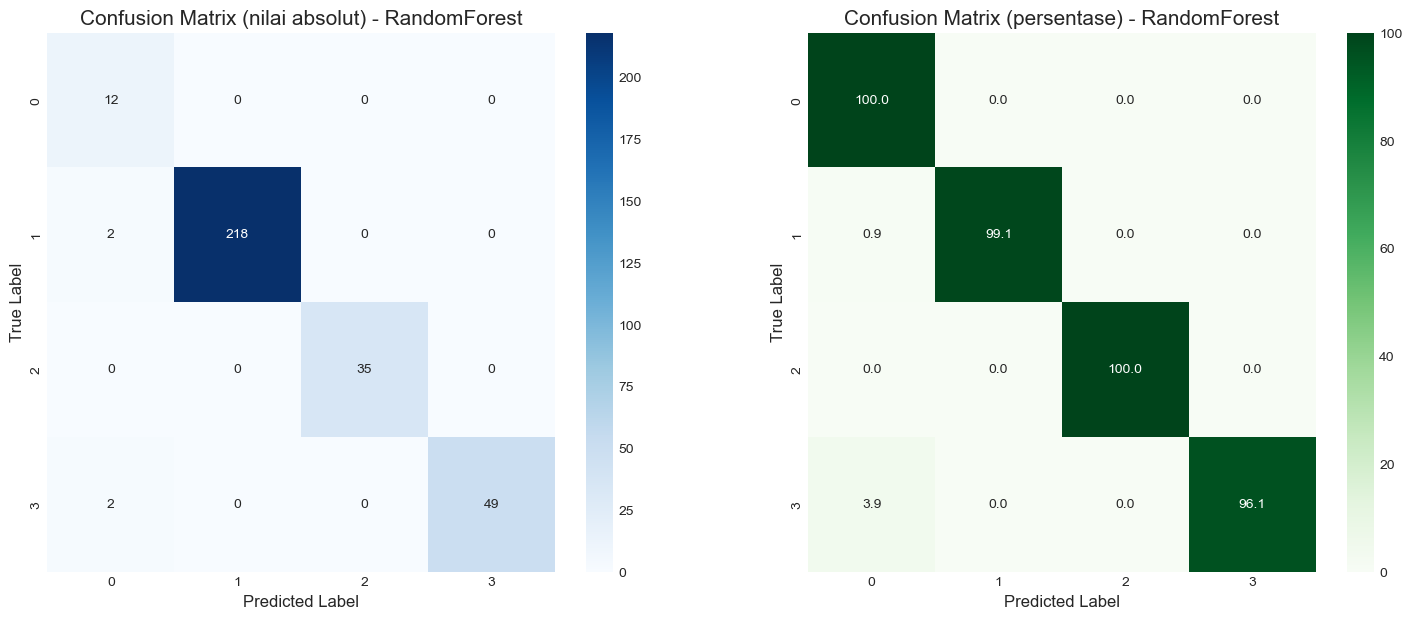


--------------------------------------------------
Evaluasi model SVM...
--------------------------------------------------

Performa SVM:
Train Accuracy: 0.9757
Test Accuracy: 0.9686
Precision: 0.9787
Recall: 0.9686
F1 Score: 0.9715

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       1.00      0.97      0.98       220
           2       1.00      0.94      0.97        35
           3       0.96      0.98      0.97        51

    accuracy                           0.97       318
   macro avg       0.89      0.97      0.92       318
weighted avg       0.98      0.97      0.97       318


Confusion Matrix:
[[ 12   0   0   0]
 [  7 213   0   0]
 [  0   0  33   2]
 [  1   0   0  50]]


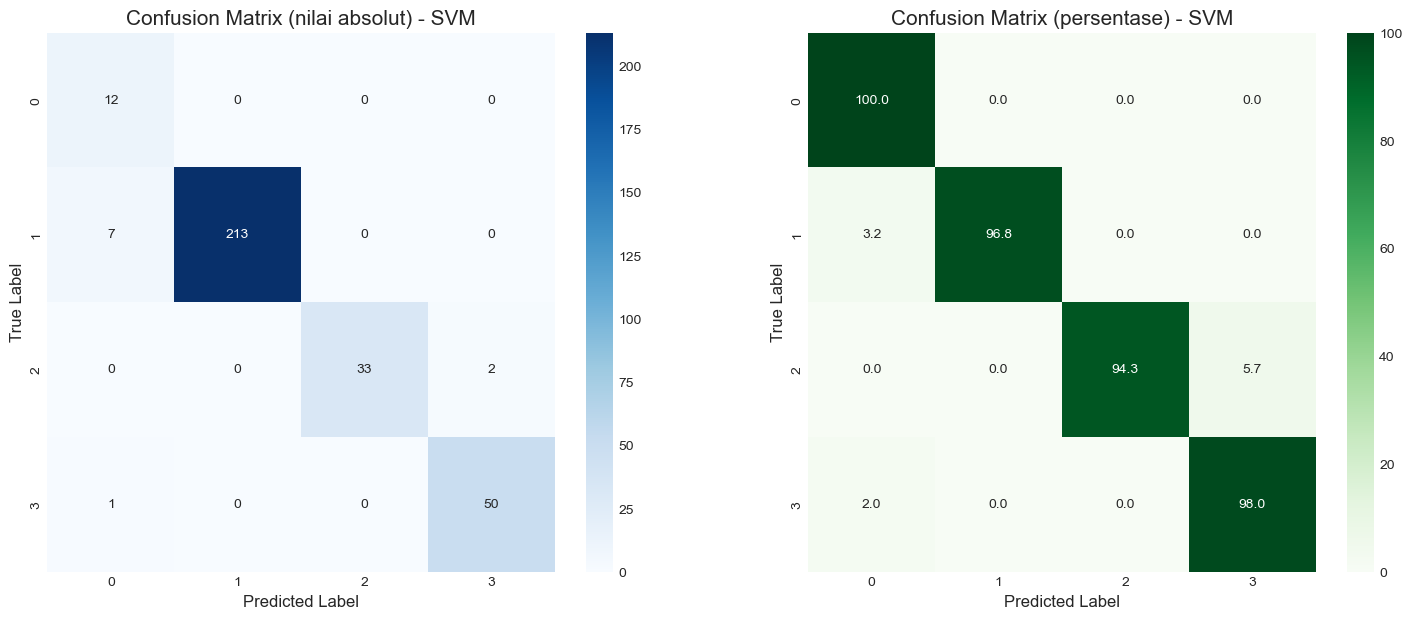


--------------------------------------------------
Evaluasi model ExtraTrees...
--------------------------------------------------

Performa ExtraTrees:
Train Accuracy: 0.9649
Test Accuracy: 0.9748
Precision: 0.9849
Recall: 0.9748
F1 Score: 0.9778

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       1.00      0.97      0.99       220
           2       1.00      1.00      1.00        35
           3       1.00      0.96      0.98        51

    accuracy                           0.97       318
   macro avg       0.90      0.98      0.93       318
weighted avg       0.98      0.97      0.98       318


Confusion Matrix:
[[ 12   0   0   0]
 [  6 214   0   0]
 [  0   0  35   0]
 [  2   0   0  49]]


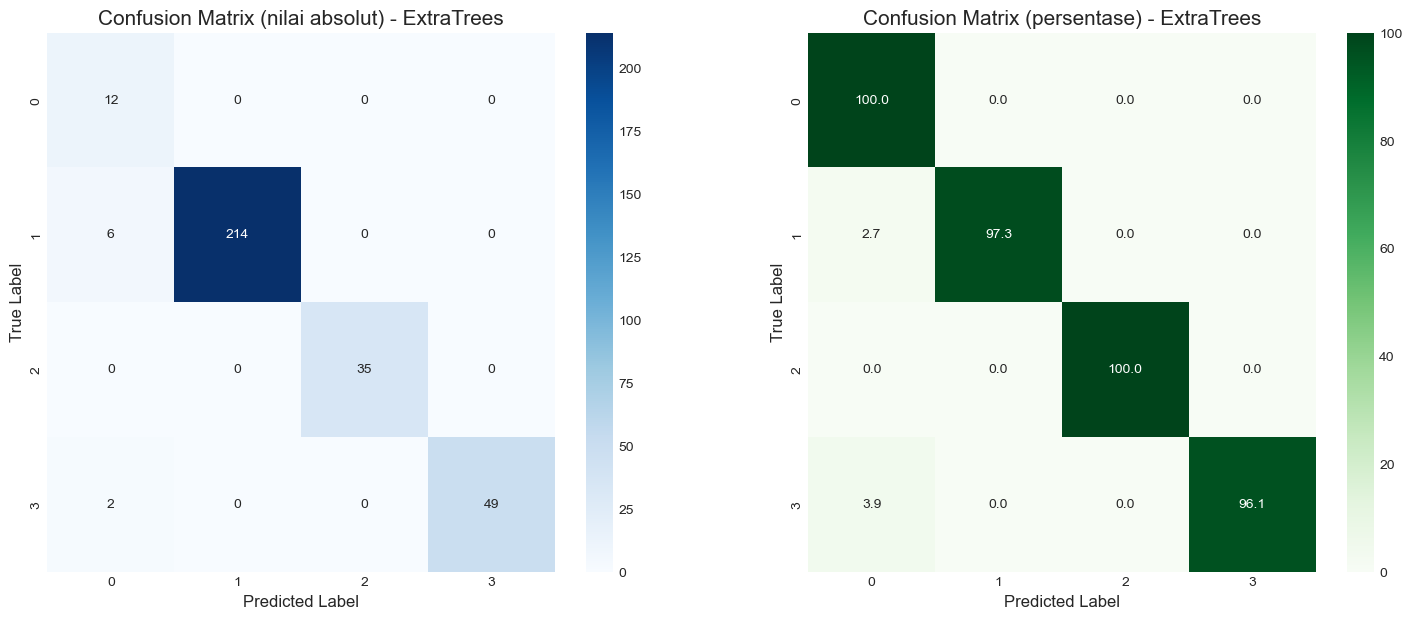

In [166]:
def create_base_models():
    """
    Membuat set model dasar dengan parameter anti-overfitting
    """
    models = {
        'RandomForest': RandomForestClassifier(
            n_estimators=100,
            max_depth=6,
            min_samples_split=8,
            min_samples_leaf=6,
            max_features='sqrt',
            bootstrap=True,
            oob_score=True,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        ),
        'SVM': SVC(
            C=0.5,
            kernel='rbf',
            gamma='scale',
            probability=True,
            class_weight='balanced',
            random_state=42
        ),
        'ExtraTrees': ExtraTreesClassifier(
            n_estimators=100,
            max_depth=6,
            min_samples_split=8,
            min_samples_leaf=6,
            max_features='sqrt',
            bootstrap=True,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )
    }
    
    return models

base_models = create_base_models()
model_results = {}

for name, model in base_models.items():
    print(f"\n{'-'*50}")
    print(f"Evaluasi model {name}...")
    print(f"{'-'*50}")
    
    metrics = evaluate_model_with_overfitting_check(model, X_train_processed, X_test_processed, 
                                                  y_train, y_test, name)
    model_results[name] = metrics
    
    plot_confusion_matrix_heatmap(y_test, metrics['y_pred'], name)

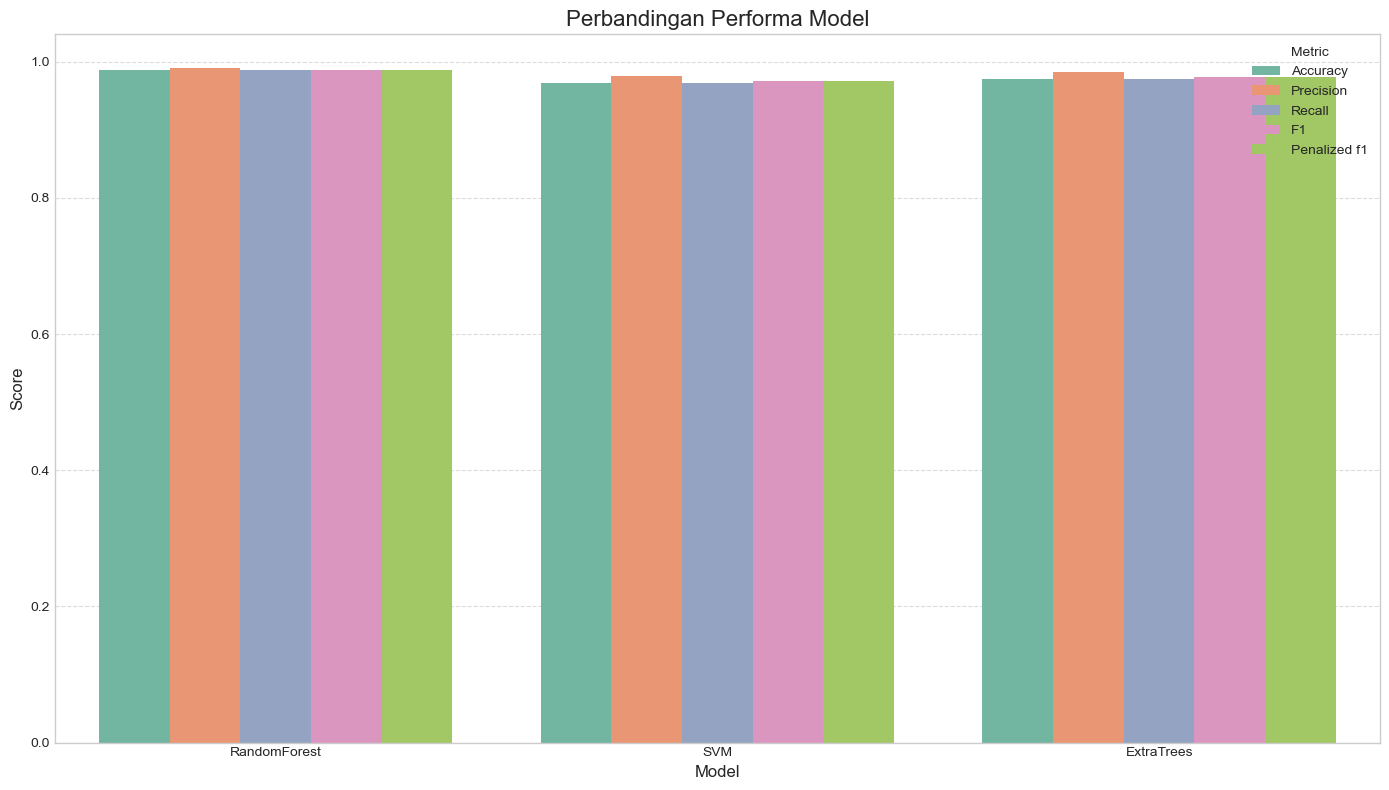

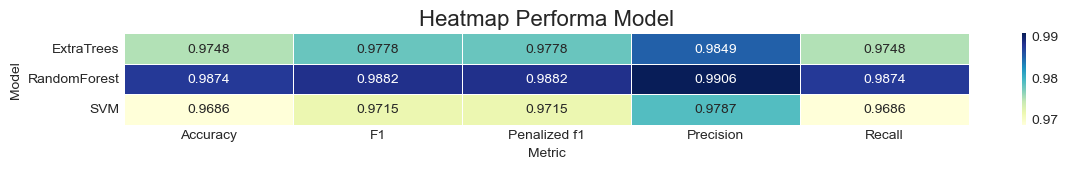

In [167]:
# Visualisasi perbandingan performa model
def plot_model_performance_comparison(model_results):
    """
    Plot perbandingan performa (F1, Accuracy, Precision, Recall) untuk semua model
    """
    models = list(model_results.keys())
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'penalized_f1']
    
    data = []
    for model in models:
        for metric in metrics:
            if metric in model_results[model]:
                data.append({
                    'Model': model,
                    'Metric': metric.capitalize().replace('_', ' '),
                    'Score': model_results[model][metric]
                })
    
    df_perf = pd.DataFrame(data)

    plt.figure(figsize=(14, 8))
    sns.barplot(x='Model', y='Score', hue='Metric', data=df_perf)
    plt.title('Perbandingan Performa Model', fontsize=16)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.legend(title='Metric')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    pivot_df = df_perf.pivot(index='Model', columns='Metric', values='Score')
    plt.figure(figsize=(12, len(models)*0.6))
    sns.heatmap(pivot_df, annot=True, fmt='.4f', cmap='YlGnBu', linewidths=.5)
    plt.title('Heatmap Performa Model', fontsize=16)
    plt.tight_layout()
    plt.show()


plot_model_performance_comparison(model_results)


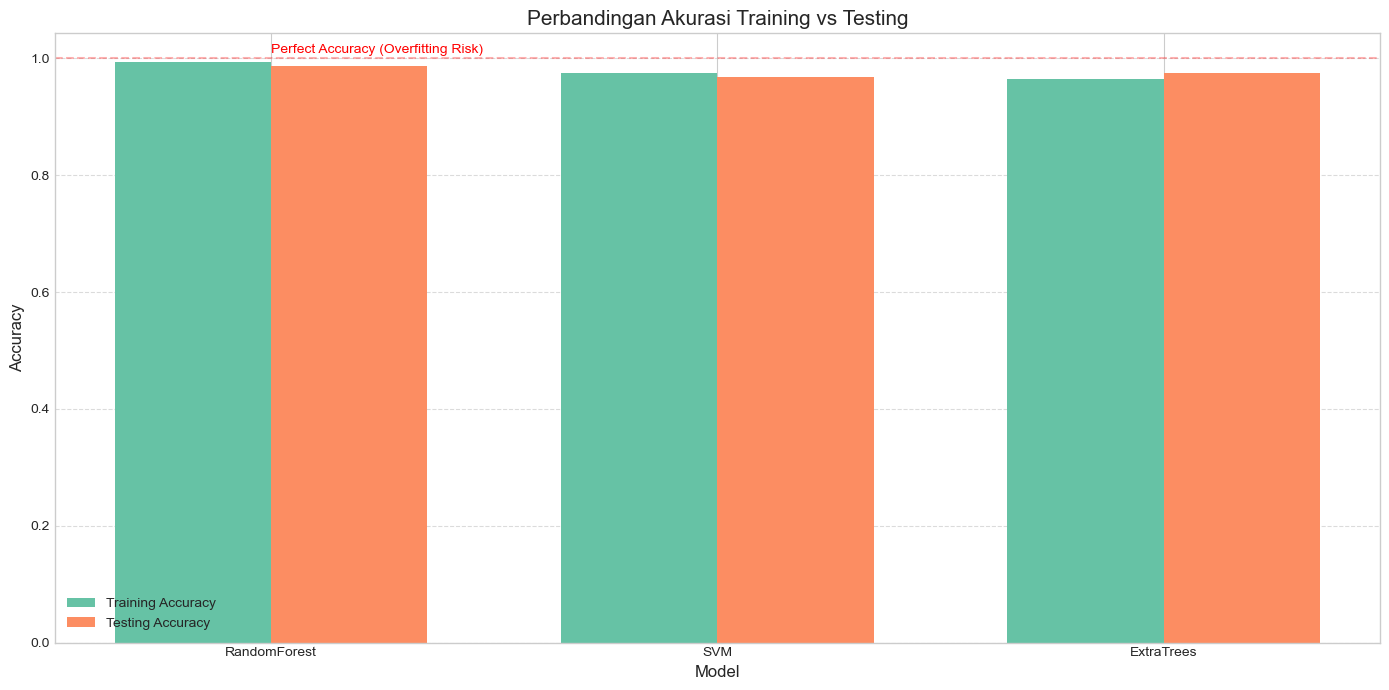

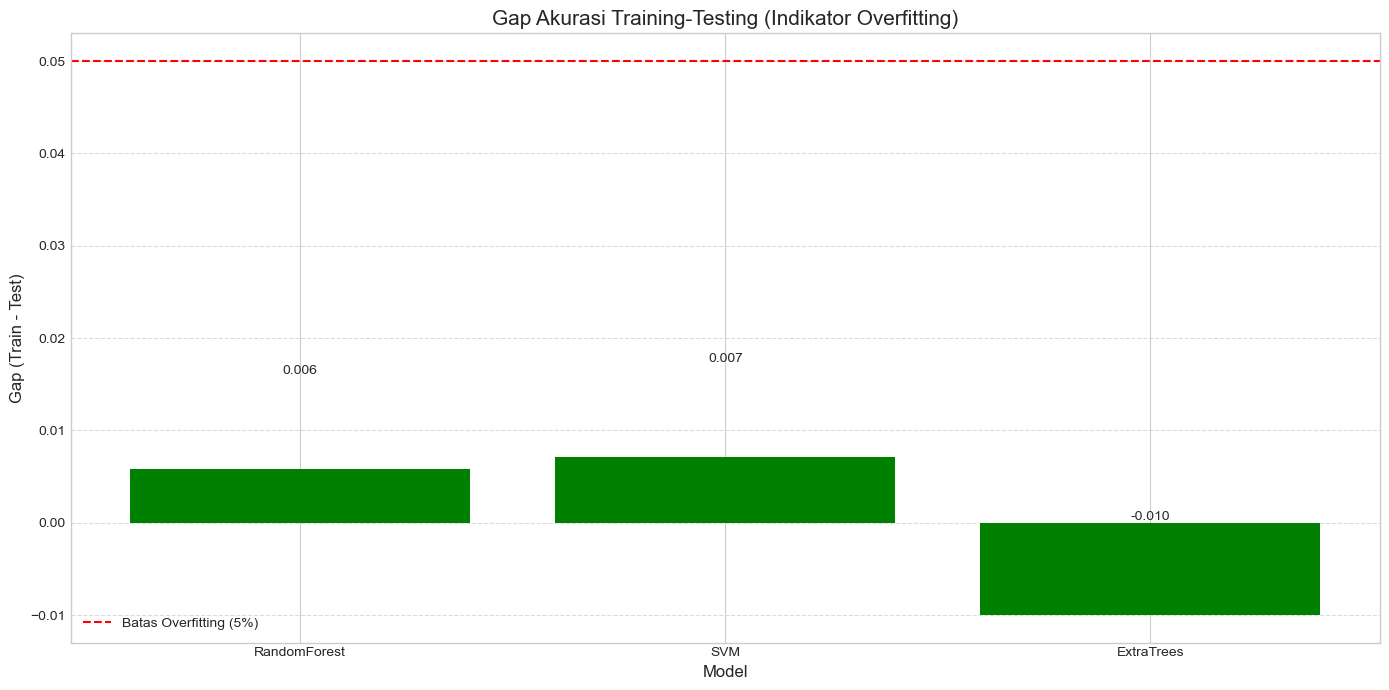

In [168]:
def plot_train_test_comparison(model_results):
    """
    Plot perbandingan akurasi train vs test untuk semua model
    """
    models = list(model_results.keys())
    train_acc = []
    test_acc = []
    is_overfitting = []
    
    for model in models:
        if 'train_accuracy' in model_results[model] and 'accuracy' in model_results[model]:
            train_acc.append(model_results[model]['train_accuracy'])
            test_acc.append(model_results[model]['accuracy'])
            is_overfitting.append(model_results[model].get('is_overfitting', False))

    x = np.arange(len(models))
    width = 0.35
    
    plt.figure(figsize=(14, 7))
    bar1 = plt.bar(x - width/2, train_acc, width, label='Training Accuracy')
    bar2 = plt.bar(x + width/2, test_acc, width, label='Testing Accuracy')
    
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Perbandingan Akurasi Training vs Testing', fontsize=15)
    plt.xticks(x, models)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.3)
    plt.text(0, 1.01, 'Perfect Accuracy (Overfitting Risk)', color='red')

    for i, is_over in enumerate(is_overfitting):
        if is_over:
            plt.text(i, train_acc[i] + 0.02, '⚠️', ha='center')
    
    plt.tight_layout()
    plt.show()

    gap = [train - test for train, test in zip(train_acc, test_acc)]
    
    plt.figure(figsize=(14, 7))
    bars = plt.bar(models, gap, color=[('red' if g > 0.05 else 'green') for g in gap])

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')
    
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Gap (Train - Test)', fontsize=12)
    plt.title('Gap Akurasi Training-Testing (Indikator Overfitting)', fontsize=15)
    plt.axhline(y=0.05, color='r', linestyle='--', label='Batas Overfitting (5%)')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_train_test_comparison(model_results)

In [169]:

print("\nRingkasan Performa Model:")
for name, metrics in model_results.items():
    print(f"{name}: F1 = {metrics['f1']:.4f}, F1 dengan penalti overfitting = {metrics['penalized_f1']:.4f}")

best_model_name = max(model_results.items(), key=lambda x: x[1]['penalized_f1'])[0]
print(f"\nModel terbaik: {best_model_name}")
print(f"F1 Score: {model_results[best_model_name]['f1']:.4f}")
print(f"F1 dengan penalti overfitting: {model_results[best_model_name]['penalized_f1']:.4f}")


Ringkasan Performa Model:
RandomForest: F1 = 0.9882, F1 dengan penalti overfitting = 0.9882
SVM: F1 = 0.9715, F1 dengan penalti overfitting = 0.9715
ExtraTrees: F1 = 0.9778, F1 dengan penalti overfitting = 0.9778

Model terbaik: RandomForest
F1 Score: 0.9882
F1 dengan penalti overfitting: 0.9882


In [170]:
if not os.path.exists('./model'):
    os.makedirs('./model')


for name, metrics in model_results.items():
    model = metrics['model']  
    

    dump(model, f'./model/{name}_model.joblib')
    
    print(f"Model {name} berhasil disimpan ke ./model/{name}_model.joblib")


best_model = model_results[best_model_name]['model']
dump(best_model, './model/best_model.joblib')

print(f"Model terbaik ({best_model_name}) berhasil disimpan ke ./model/best_model.joblib")

dump(preprocessor, './model/preprocessor.joblib')

print("Preprocessor berhasil disimpan ke ./model/preprocessor.joblib")

Model RandomForest berhasil disimpan ke ./model/RandomForest_model.joblib
Model SVM berhasil disimpan ke ./model/SVM_model.joblib
Model ExtraTrees berhasil disimpan ke ./model/ExtraTrees_model.joblib
Model terbaik (RandomForest) berhasil disimpan ke ./model/best_model.joblib
Preprocessor berhasil disimpan ke ./model/preprocessor.joblib
